In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

- **cheak duplicates**

In [5]:
data.duplicated().sum()

0

- **cheak is null**

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- **Deling replace the value**

In [7]:
mean_age = data.Age.mean()
mean_age

29.69911764705882

In [8]:
data.Age.replace(np.nan,mean_age,inplace = True)
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
mode_Embarked = data.Embarked.mode()[0]
mode_Embarked

'S'

In [10]:
data.Embarked.replace(np.nan,mode_Embarked, inplace =True)
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [11]:
# creating a new column family_members by adding SibSp and Parch
data['family_members'] = data.SibSp + data.Parch
data.drop(['SibSp', 'Parch','Cabin'], axis = 1, inplace = True)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


In [12]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1


- **Unique values**

In [13]:
print("Survived :",data.Survived.unique())
print("Pclass :",data.Pclass.unique())
print("Sex :",data.Sex.unique())
print("Embarked :",data.Embarked.unique())

Survived : [0 1]
Pclass : [3 1 2]
Sex : ['male' 'female']
Embarked : ['S' 'C' 'Q']


<Axes: xlabel='Survived', ylabel='count'>

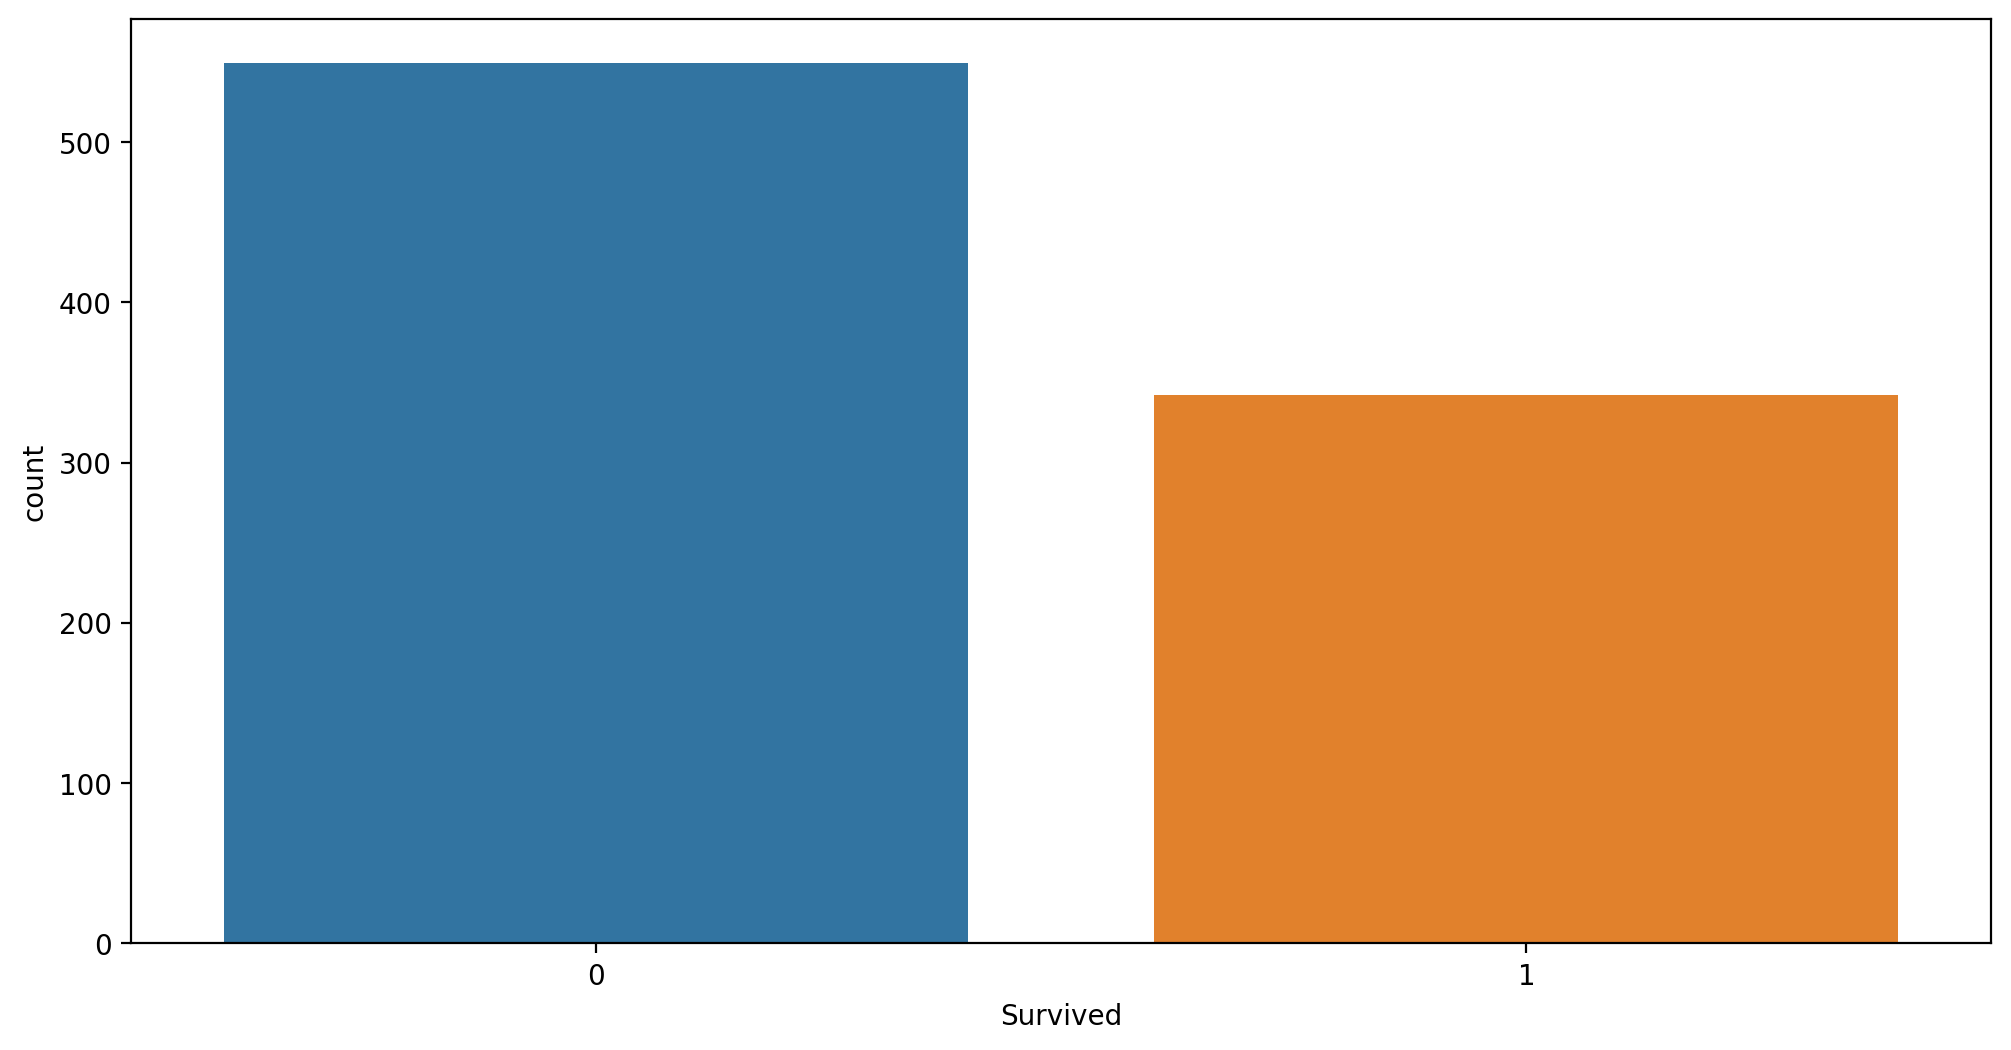

In [14]:
plt.figure(figsize = (12,6),dpi = 200)
sns.countplot(x = "Survived", data = data)

In [15]:
data.shape

(891, 10)

In [16]:
data.groupby(by = "Sex")["Survived"].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [17]:
data.Survived.value_counts(normalize= True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [18]:
survived =data.Survived.value_counts(normalize= True)

print("percetage of survival :",round(survived[1]*100,2),"%")
print("percentage of Dead    :",round(survived[0]*100,2),"%")

percetage of survival : 38.38 %
percentage of Dead    : 61.62 %


<Axes: xlabel='Sex', ylabel='count'>

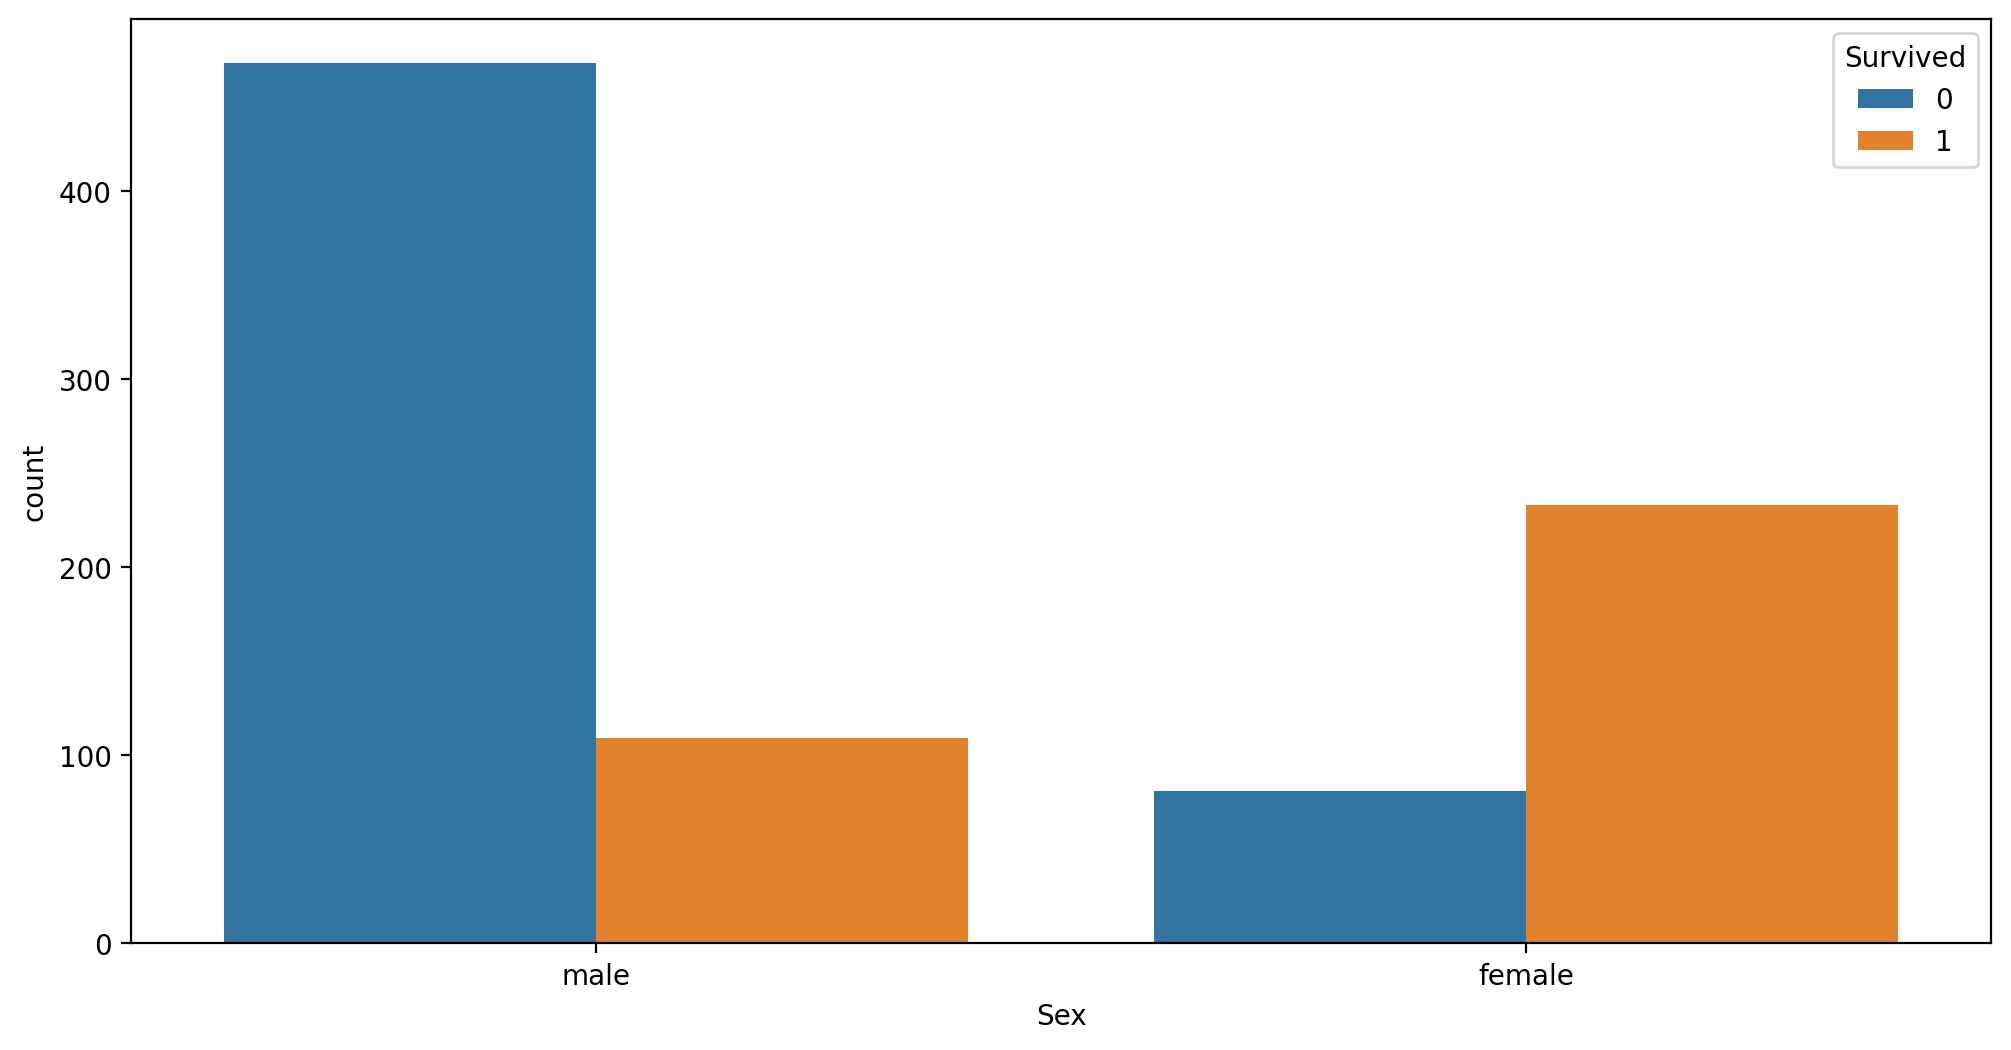

In [19]:
# Sex affected by Survived
plt.figure(figsize = (12,6),dpi = 200)
sns.countplot(x = "Sex",hue = "Survived",data = data)

In [20]:
Gender = data.Sex.value_counts()
Gender_Lebel   = ['male','female']
# Total_survival = data.Survived.value_counts().sort_index()[1]
# Total_dead     = data.Survived.value_counts().sort_index()[0]
Total_survival = data.groupby(by ='Sex')['Survived'].value_counts()
survival_female = data.groupby(by ='Sex')['Survived'].value_counts().sort_index()['female']
survival_male  = data.groupby(by ='Sex')['Survived'].value_counts().sort_index()['male']
survival_label = ['Survived','Dead']

In [21]:
print("Total male exists :", Gender)
print("TOtal female exists:", Gender)

Total male exists : male      577
female    314
Name: Sex, dtype: int64
TOtal female exists: male      577
female    314
Name: Sex, dtype: int64


In [22]:
Total_survival

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [23]:
survival_female

Survived
0     81
1    233
Name: Survived, dtype: int64

In [24]:
survival_male

Survived
0    468
1    109
Name: Survived, dtype: int64

Text(0.5, 1.0, 'female survival')

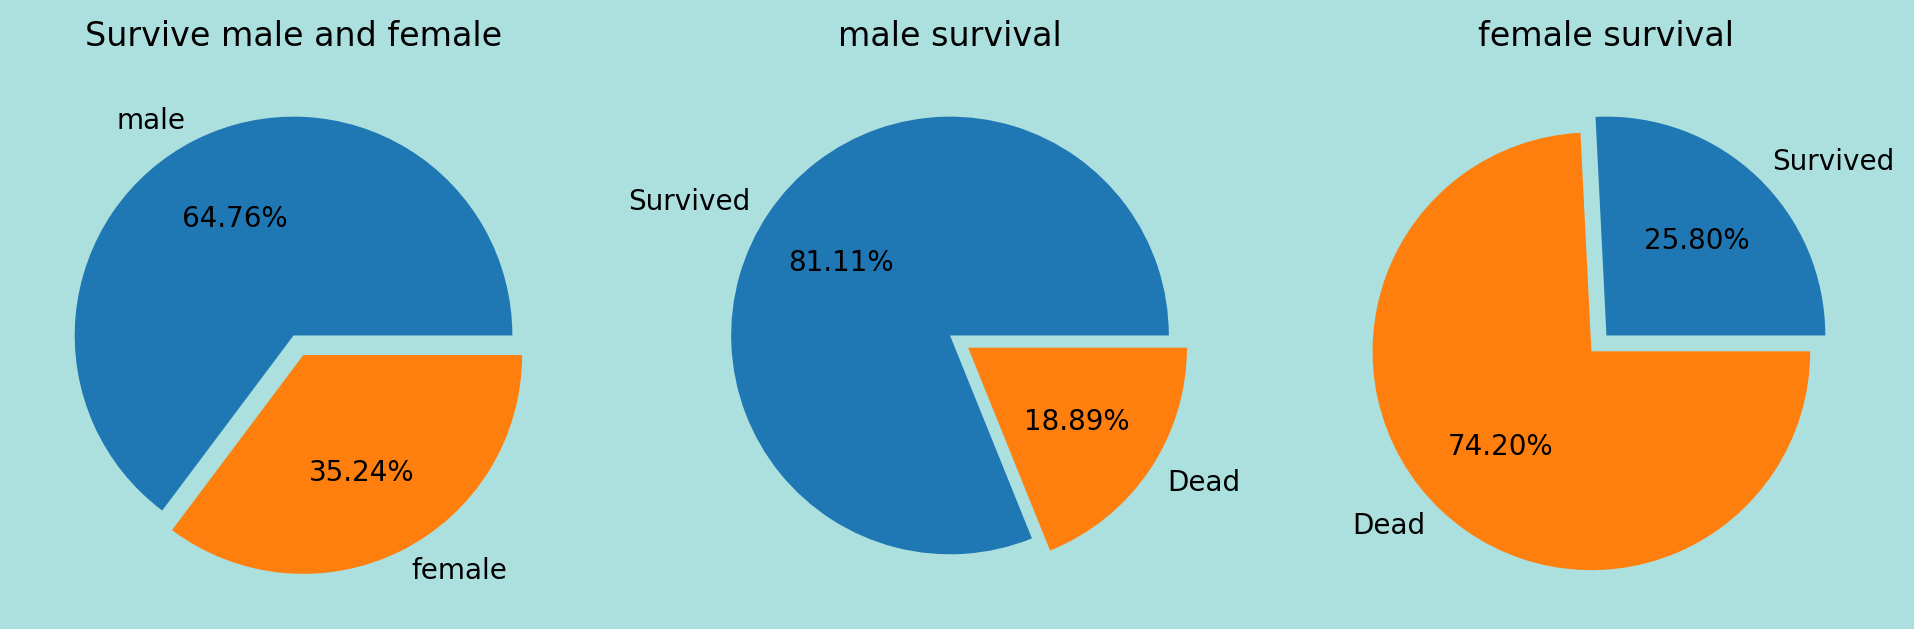

In [25]:
plt.figure(figsize = (12,6),dpi = 200, facecolor = '#abe0de')
plt.subplot(1,3,1)
plt.pie(x = Gender, labels = Gender_Lebel, autopct = '%1.2f%%', explode = [0,0.1])
plt.title('Survive male and female')

plt.subplot(1,3,2)
plt.pie(x = survival_male, labels = survival_label, autopct = '%1.2f%%', explode = [0,0.1])
plt.title('male survival')

plt.subplot(1,3,3)
plt.pie(x = survival_female, labels = survival_label, autopct = '%1.2f%%', explode= [0,0.1])
plt.title('female survival')


**Conclusion :-**
- **1. Male are more survived comparision to female servivor**
- **2. more female are Dead in the desaster comparision to female**

In [26]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1


In [27]:
Total1 = data.Embarked.value_counts().sort_index()['S']
print("Embarked in S :", Total1)

Embarked in S : 646


In [28]:
Total2  = data.Embarked.value_counts().sort_index()['C']
print("Embarked in C :", Total2)

Embarked in C : 168


In [29]:
Total3 = data.Embarked.value_counts().sort_index()['Q']
print("Embarked in Q :", Total3)

Embarked in Q : 77


In [30]:
Total_Embarked = Total1 + Total2 + Total3
Total_Embarked

891

<Axes: xlabel='Embarked', ylabel='count'>

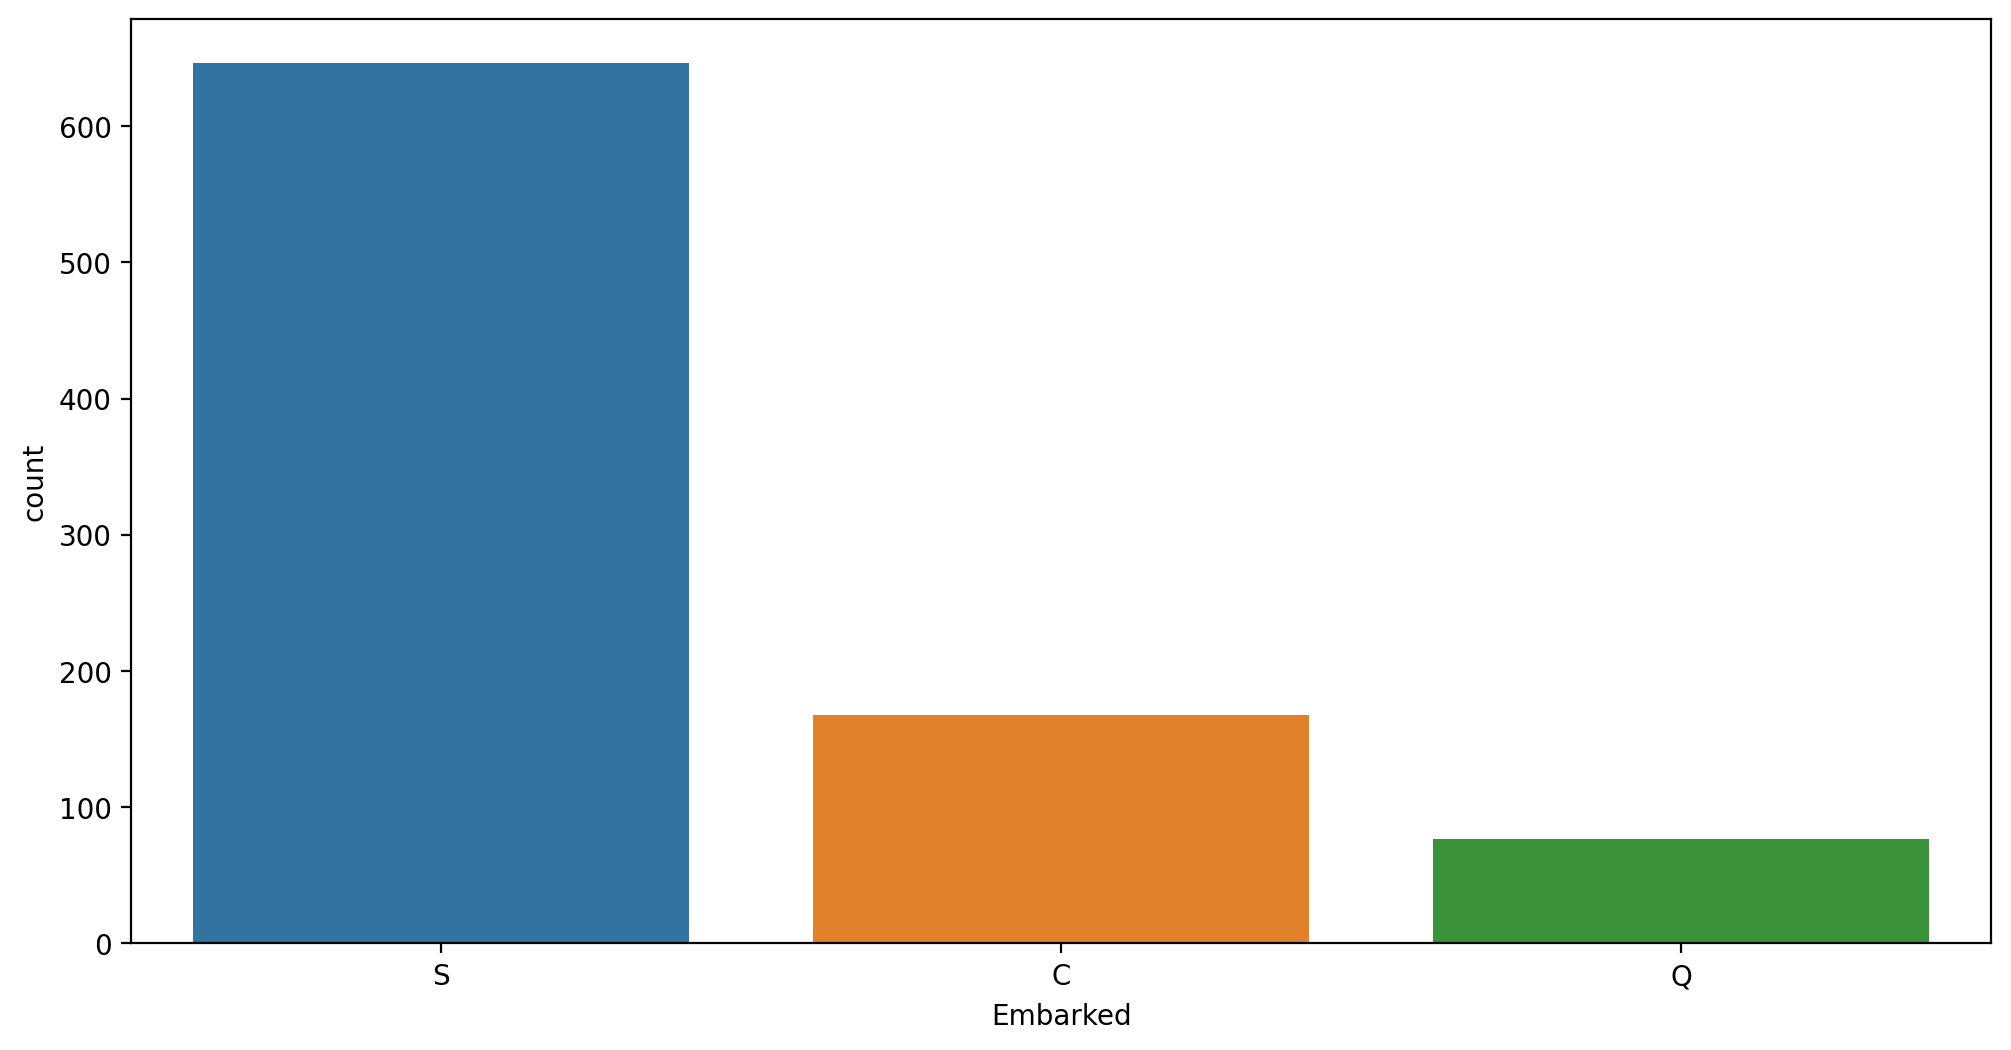

In [31]:
plt.figure(figsize = (12,6),dpi = 200)
sns.countplot(x ="Embarked",data =data)

In [32]:
data.groupby(by= "Embarked").Survived.value_counts().sort_index(ascending= False)

Embarked  Survived
S         1           219
          0           427
Q         1            30
          0            47
C         1            93
          0            75
Name: Survived, dtype: int64

<Axes: xlabel='Embarked', ylabel='Survived'>

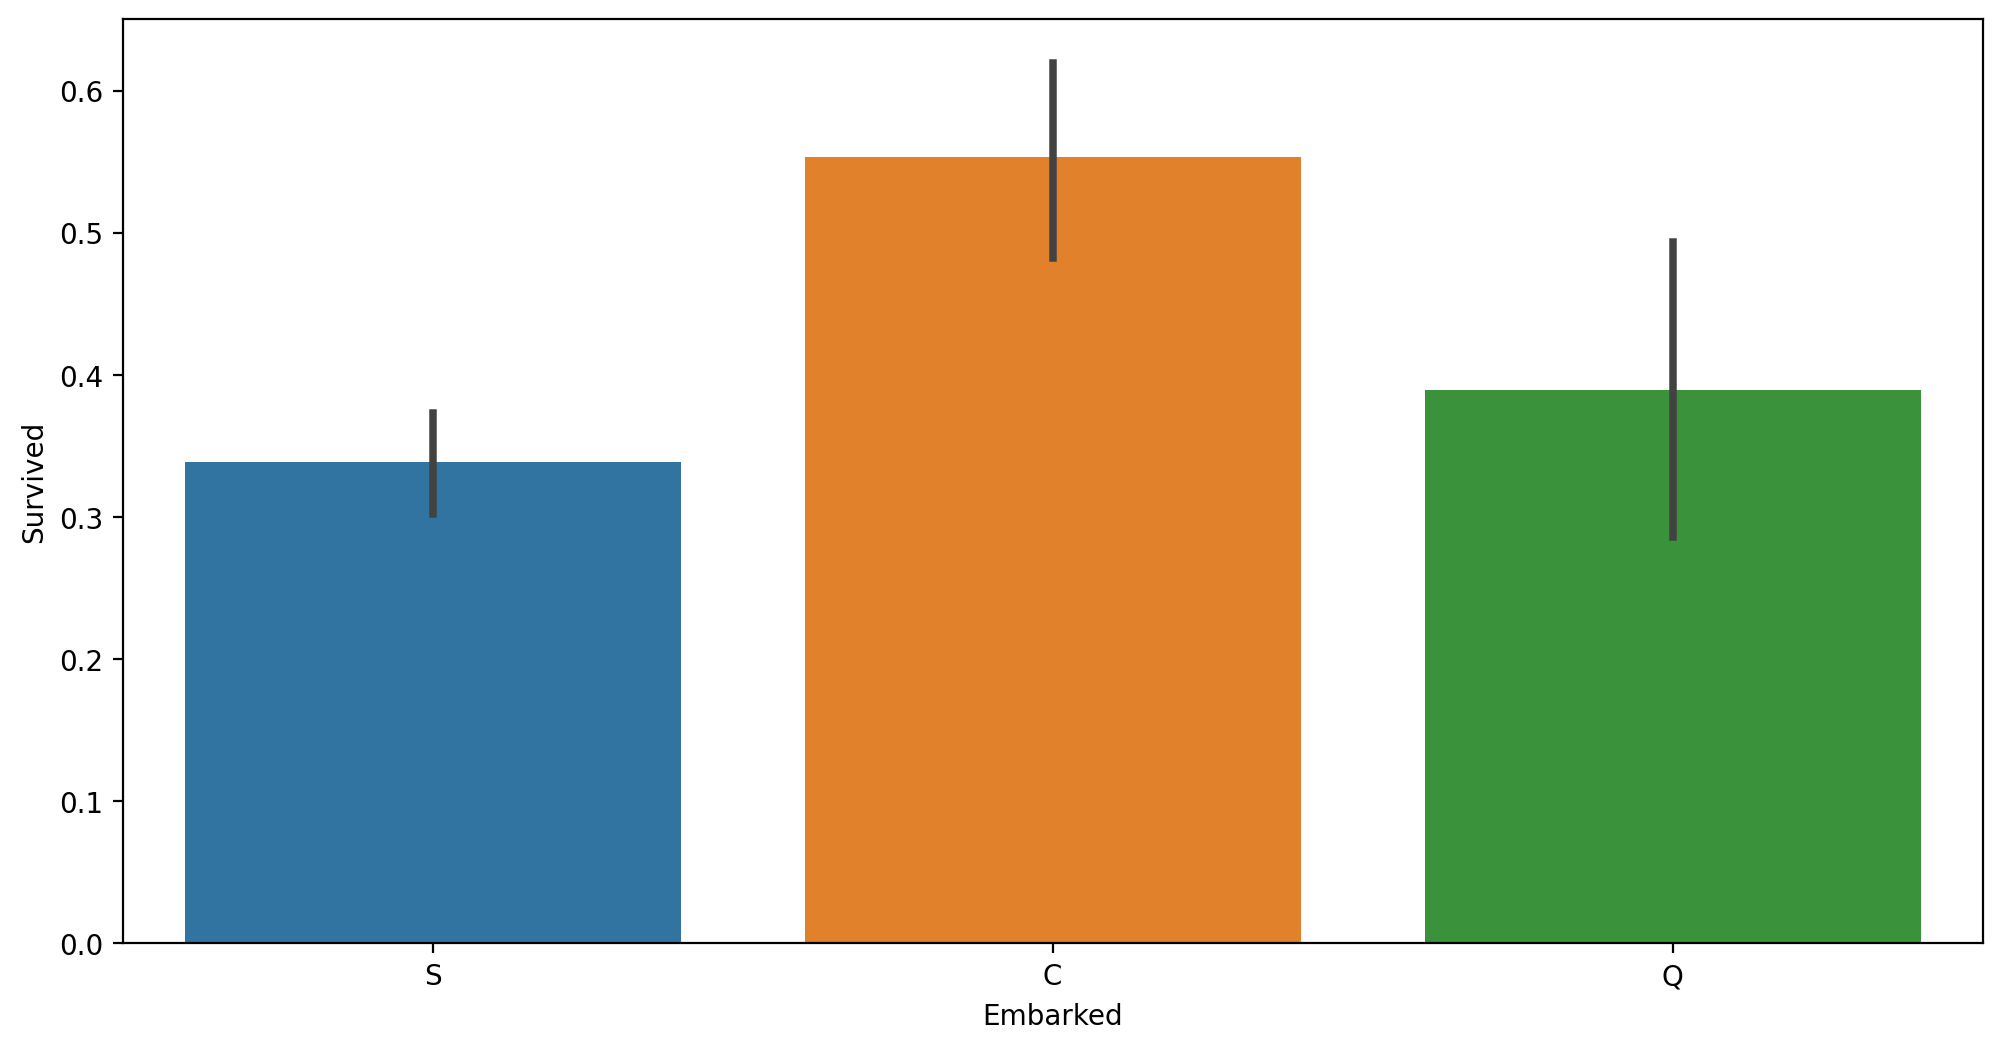

In [33]:
# data_desc = data.groupby(by= "Embarked").Survived.value_counts().index
plt.figure(figsize = (12,6),dpi = 200)
sns.barplot(x ="Embarked",y ="Survived",data=data, )

In [34]:
Embaked_lebel = data.groupby(by = "Embarked").Survived.value_counts().sort_index()
survival_leble= ['Servival', 'Dead']

Text(0.5, 1.0, 'Embarked Q')

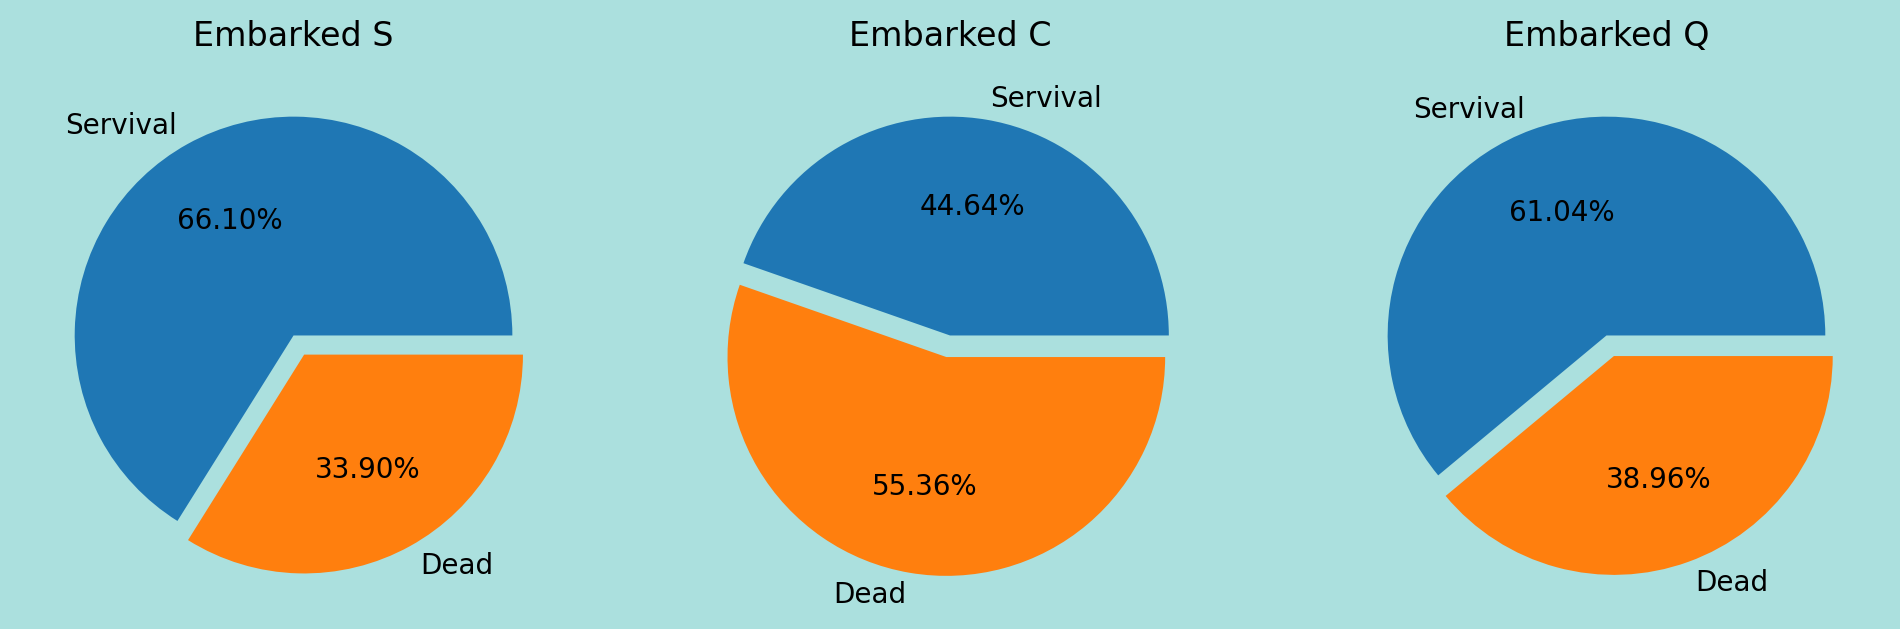

In [35]:
plt.figure(figsize = (12,6),dpi = 200,facecolor = '#abe0de')
plt.subplot(1,3,1)
plt.pie(x = Embaked_lebel['S'], labels =survival_leble, autopct = '%1.2f%%', explode = [0,0.1] )
plt.title('Embarked S')

plt.subplot(1,3,2)
plt.pie(x = Embaked_lebel['C'], labels =survival_leble, autopct = '%1.2f%%', explode = [0,0.1])
plt.title('Embarked C')


plt.subplot(1,3,3)
plt.pie(x = Embaked_lebel['Q'], labels =survival_leble, autopct = '%1.2f%%', explode = [0,0.1])
plt.title('Embarked Q')


- **Embacked S are more survived in the accidents compare to other**
- **Embacked C are more dead in the accident compare to other**

In [36]:
data.groupby(by = "Sex").Embarked.value_counts()

Sex     Embarked
female  S           205
        C            73
        Q            36
male    S           441
        C            95
        Q            41
Name: Embarked, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

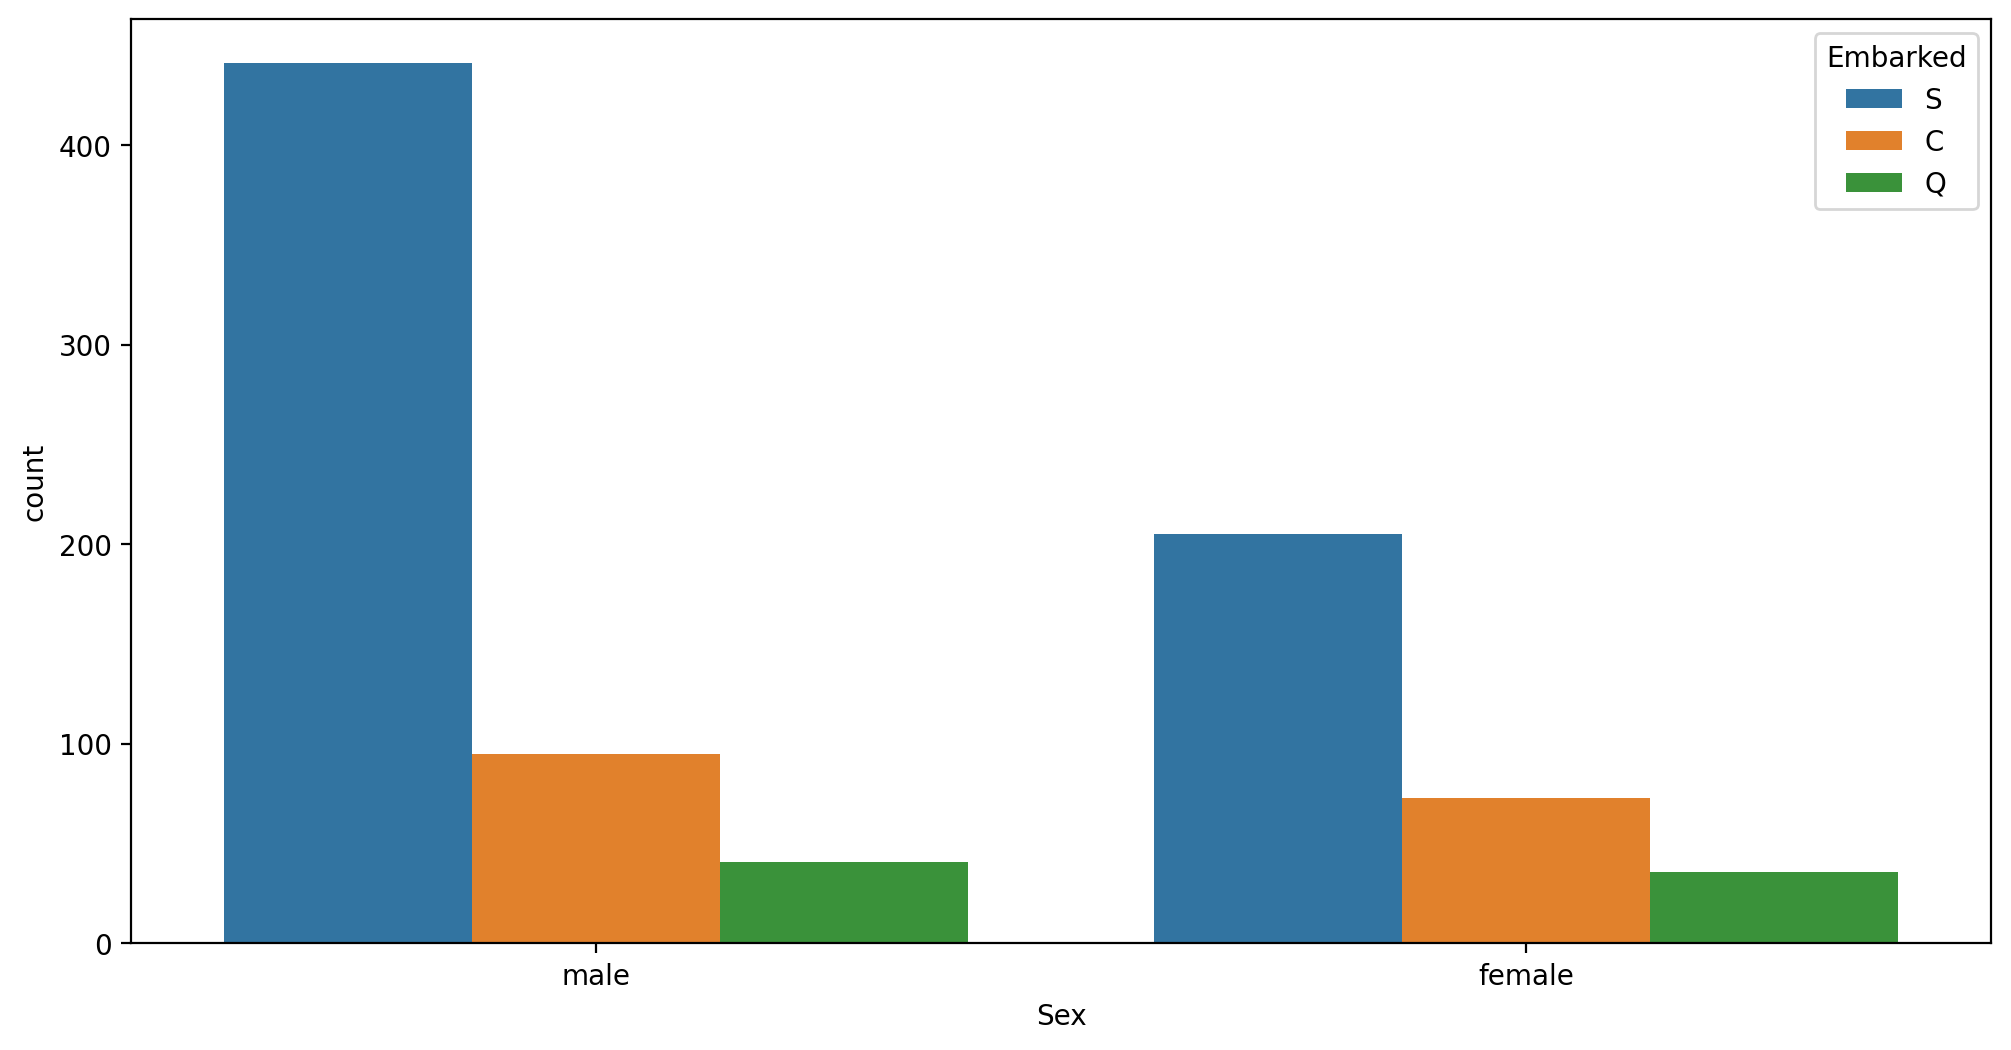

In [37]:
# Sex affect by Embarked.
plt.figure(figsize = (12,6),dpi =200)
sns.countplot(x= "Sex",hue ="Embarked",data= data)

- **Male is Heighest compare to female**

In [38]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.25,S,1


<Axes: xlabel='Pclass', ylabel='count'>

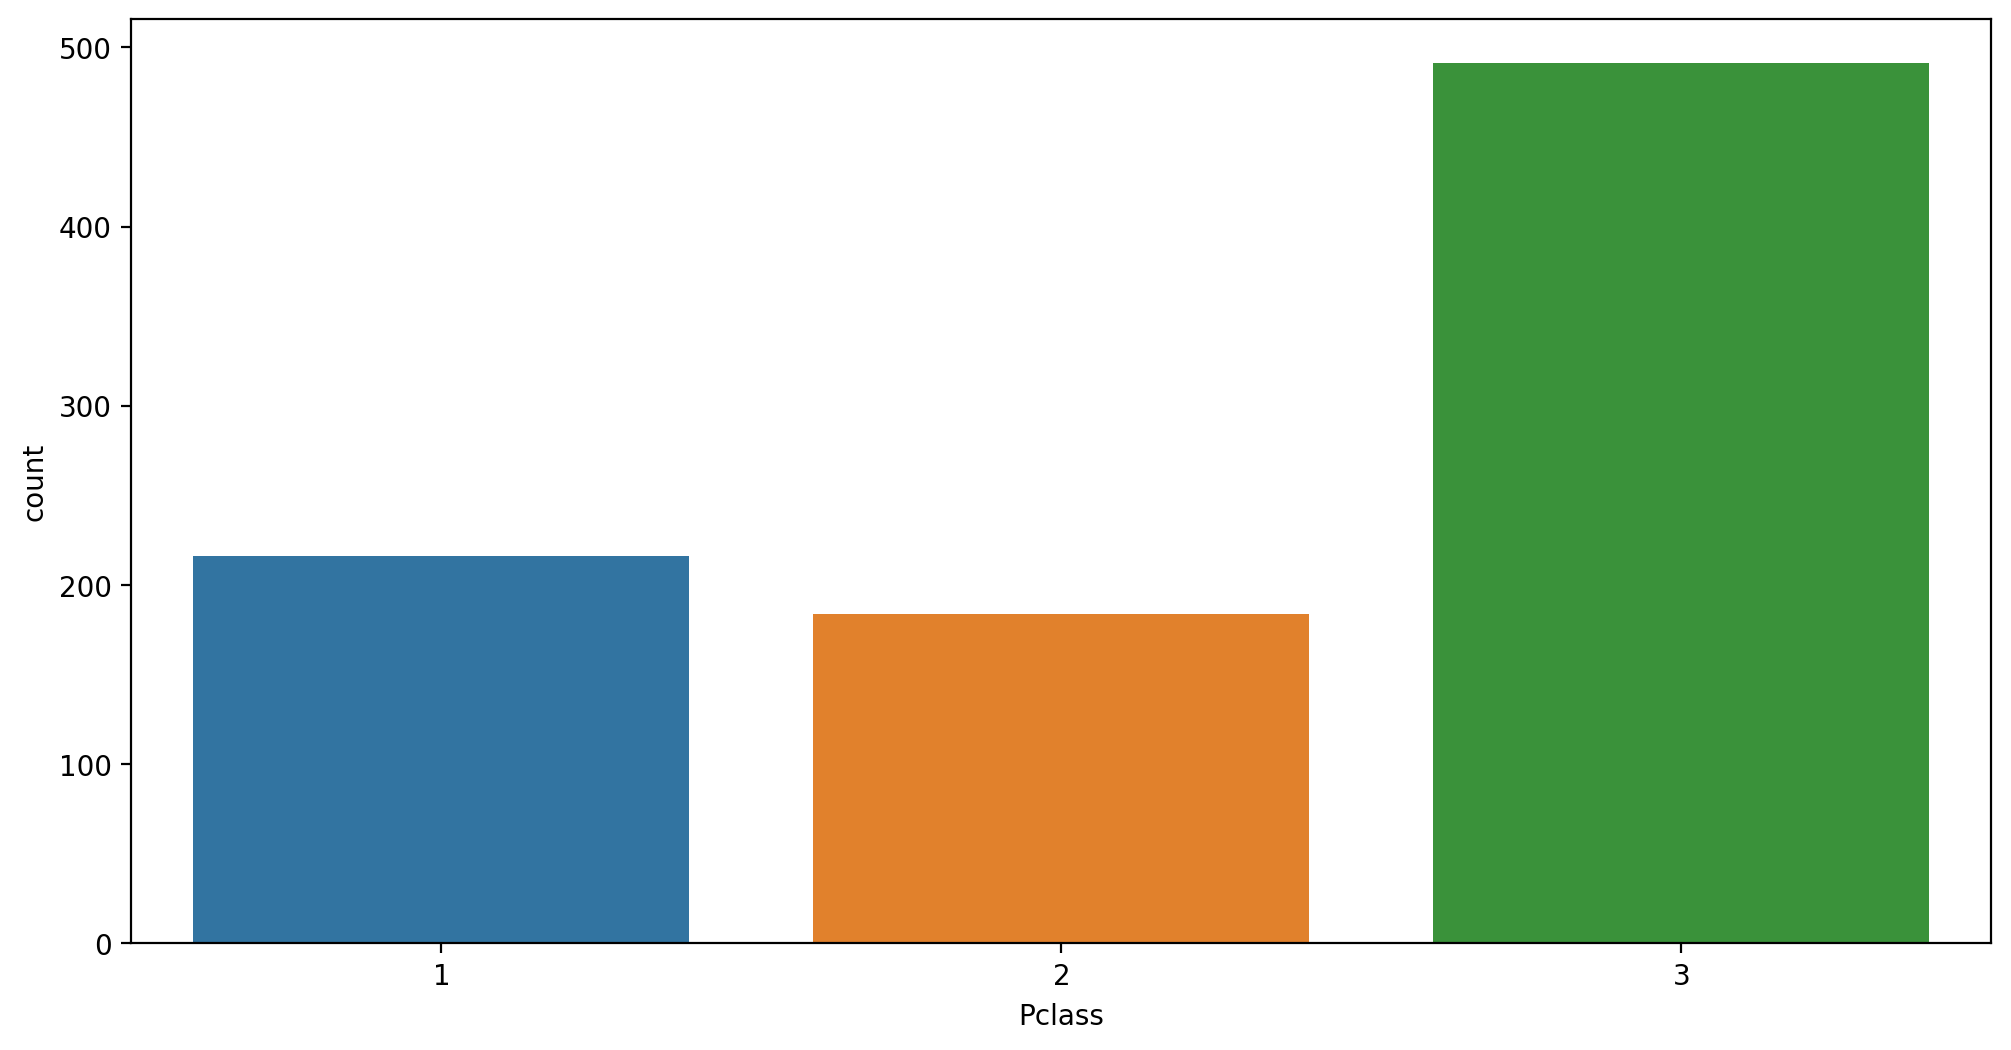

In [39]:
plt.figure(figsize = (12,6),dpi =200)
sns.countplot(x = "Pclass",data = data)

In [40]:
data.groupby(by = "Pclass").Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<Axes: xlabel='Pclass', ylabel='Survived'>

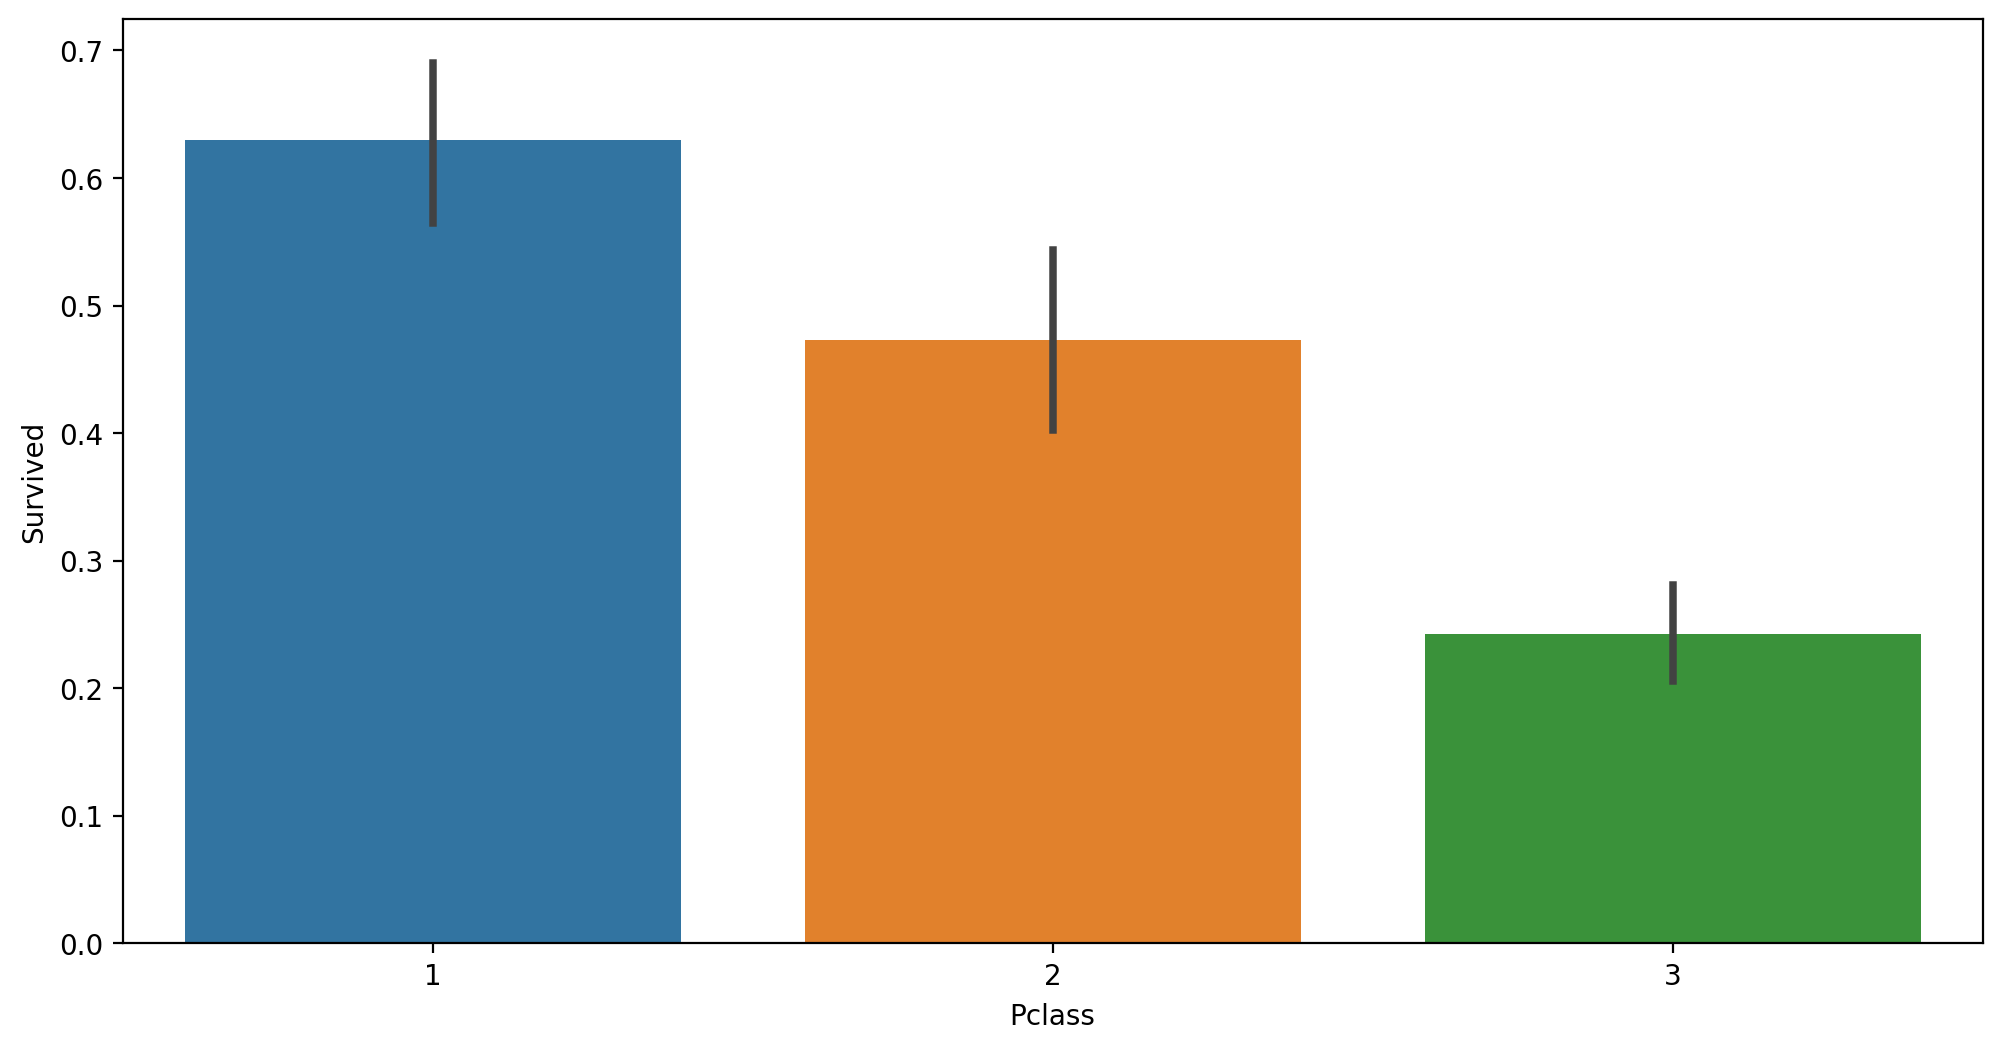

In [41]:
plt.figure(figsize = (12,6),dpi =200)
sns.barplot(x ="Pclass", y ="Survived",data = data )

In [42]:
pclass_lebel = data.groupby(by ="Pclass").Survived.value_counts().sort_index()
svl_labels = ['Dead', 'Survived']

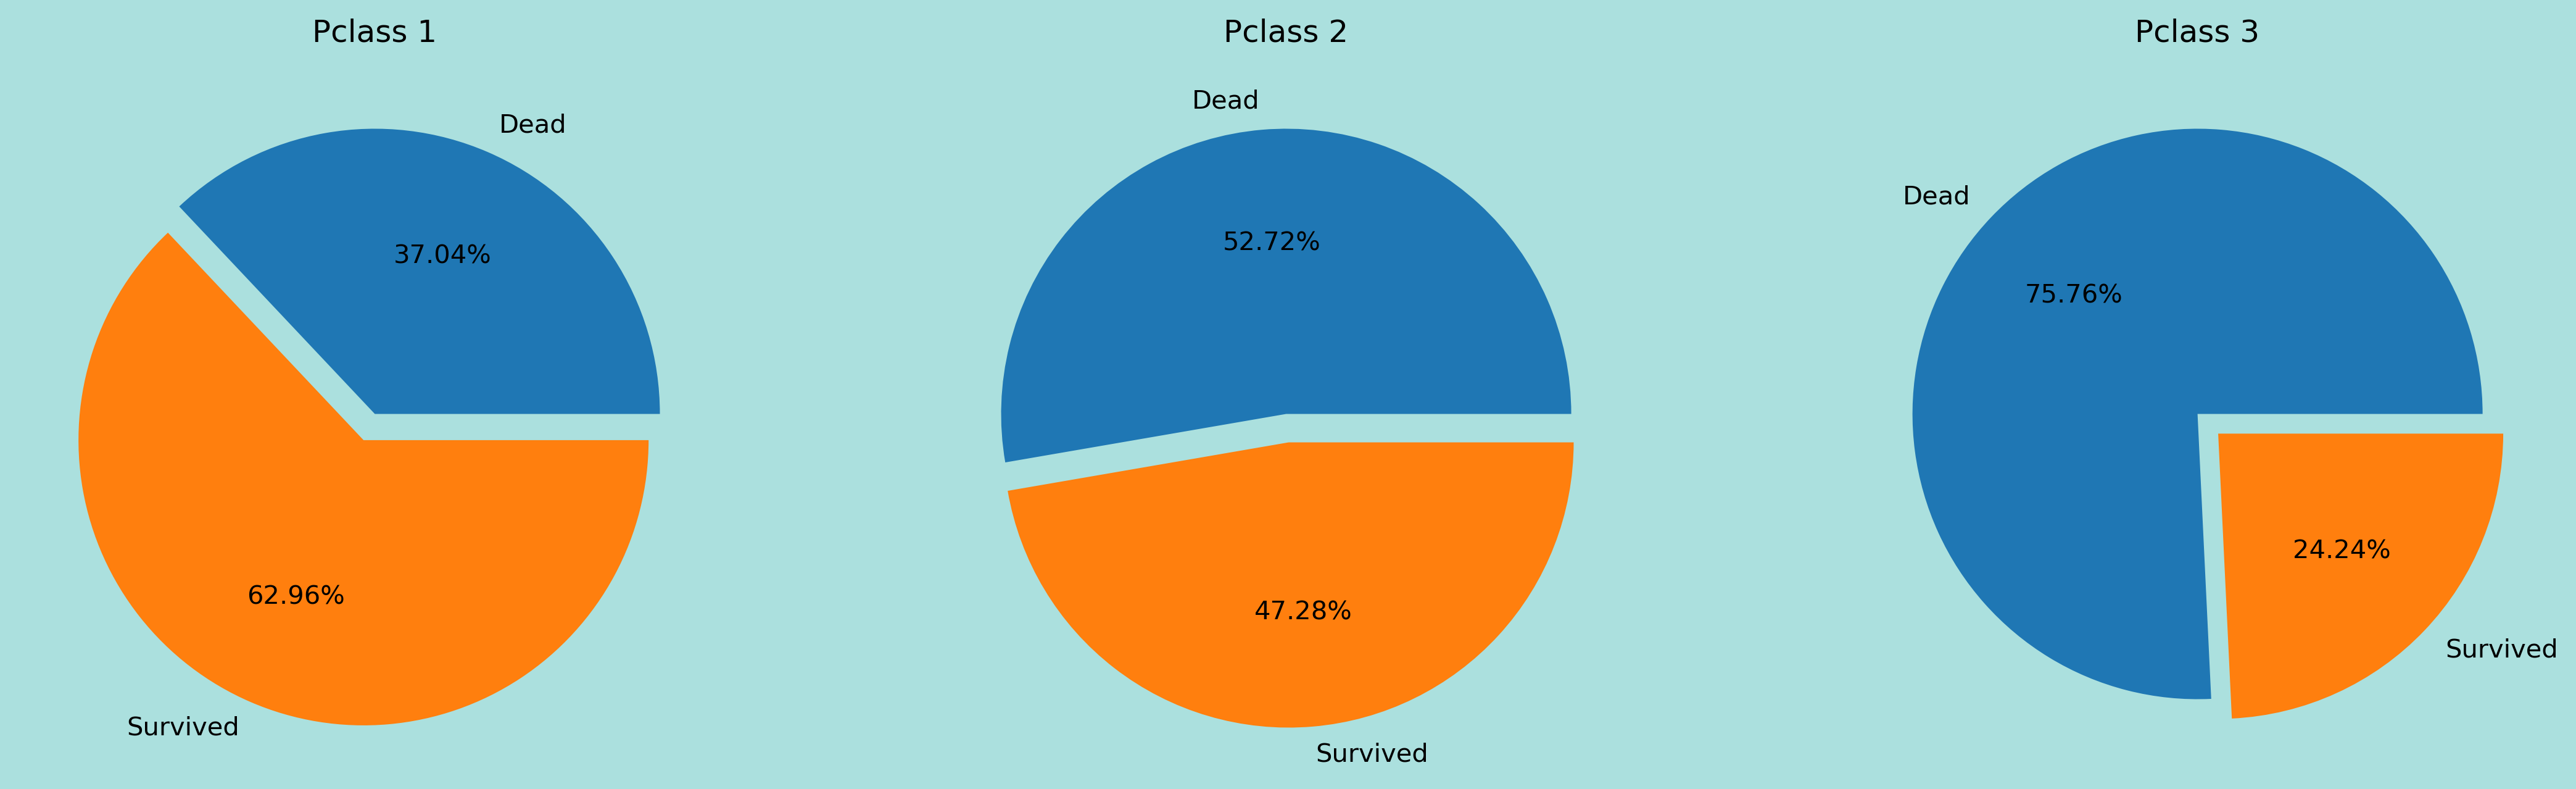

In [43]:
plt.figure(figsize = (18,5), dpi = 300, facecolor = '#abe0de')
plt.subplot(1,3,1)
plt.pie(x = pclass_lebel[1], labels = ['Dead', 'Survived'], autopct = '%1.2f%%', explode = [0,0.1])
plt.title('Pclass 1')

plt.subplot(1,3,2)
plt.pie(x = pclass_lebel[2], labels = ['Dead', 'Survived'], autopct = '%1.2f%%', explode = [0,0.1])
plt.title('Pclass 2')

plt.subplot(1,3,3)
plt.pie(x = pclass_lebel[3], labels = ['Dead', 'Survived'], autopct = '%1.2f%%', explode = [0,0.1])
plt.title('Pclass 3')

plt.show()

- **Pclass3 are more servived compare to other classes**
- **Pclass1 are more dead compare to other classes**


In [44]:
data.groupby(by = "Embarked").Pclass.value_counts()

Embarked  Pclass
C         1          85
          3          66
          2          17
Q         3          72
          2           3
          1           2
S         3         353
          2         164
          1         129
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass', ylabel='Embarked'>

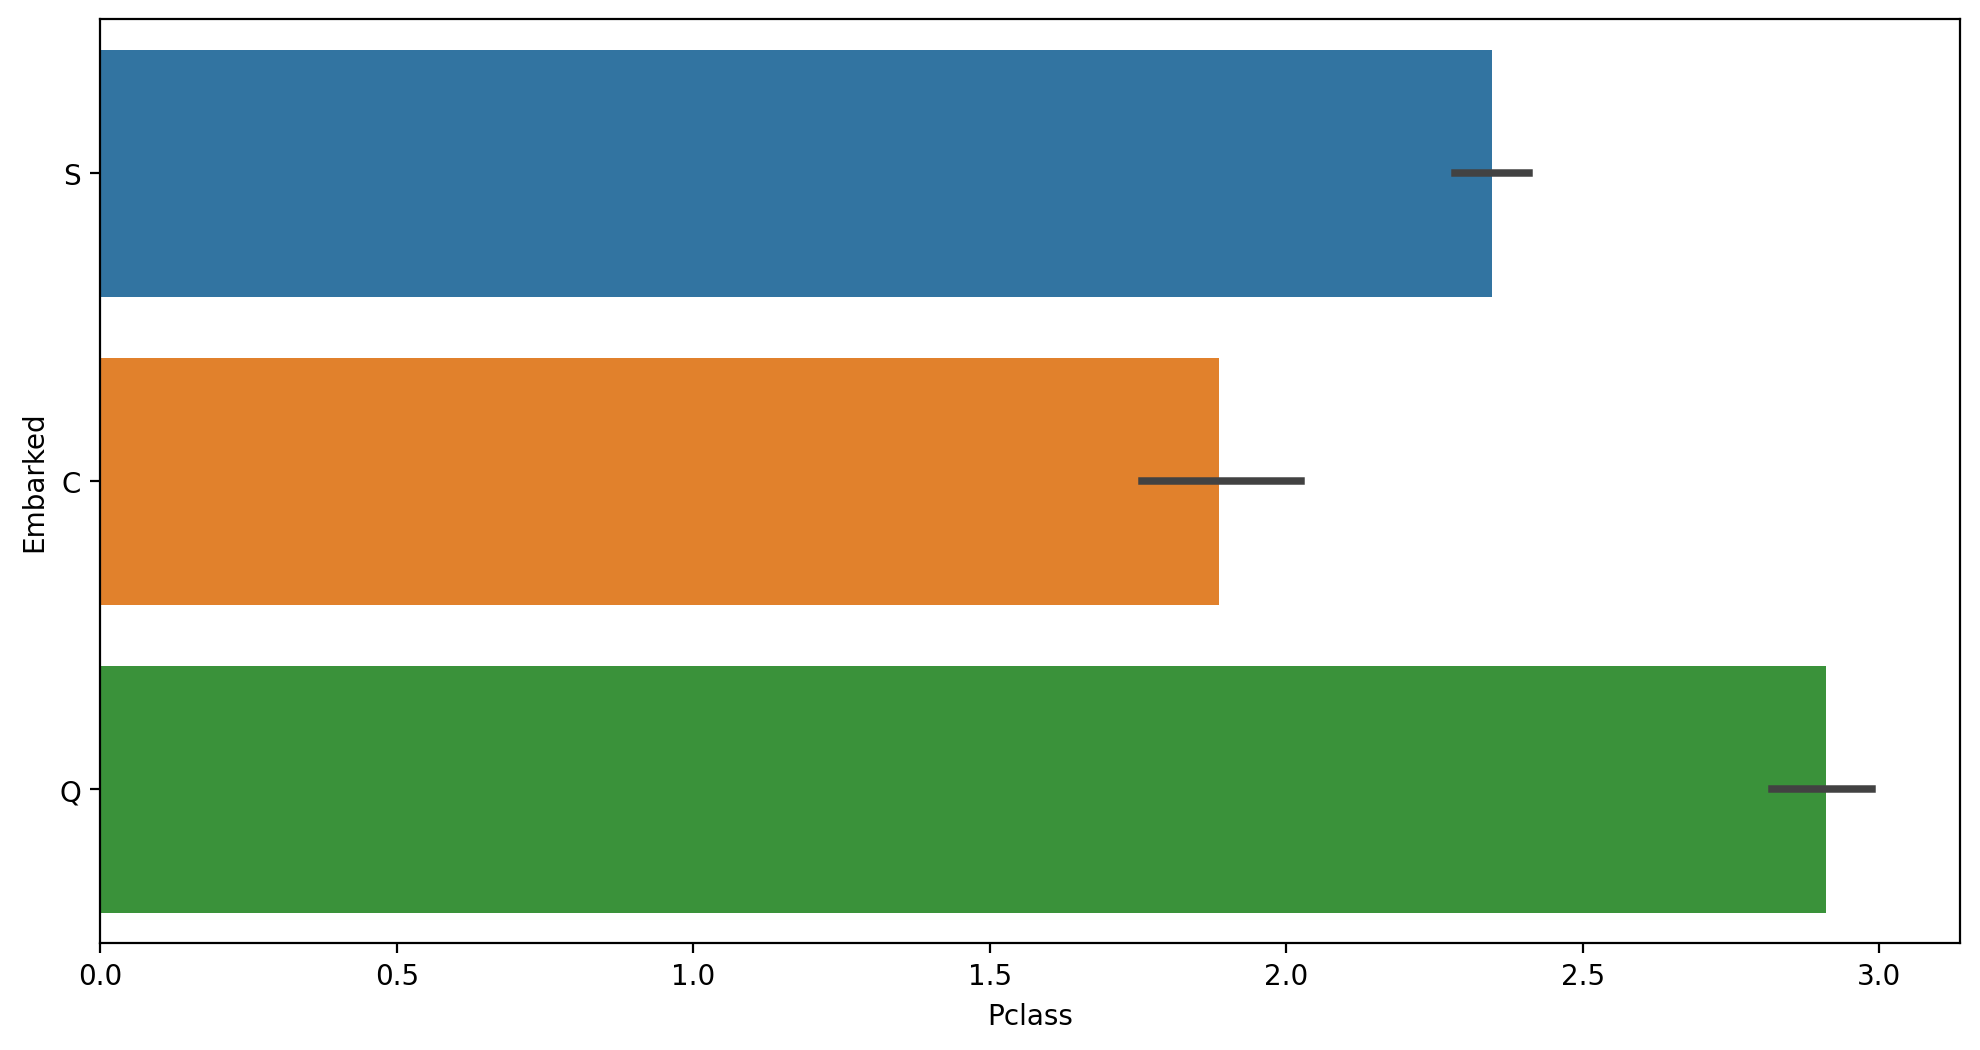

In [45]:
plt.figure(figsize = (12,6),dpi =200)
sns.barplot(x = "Pclass", y = "Embarked",data = data)

<Axes: xlabel='Embarked', ylabel='Fare'>

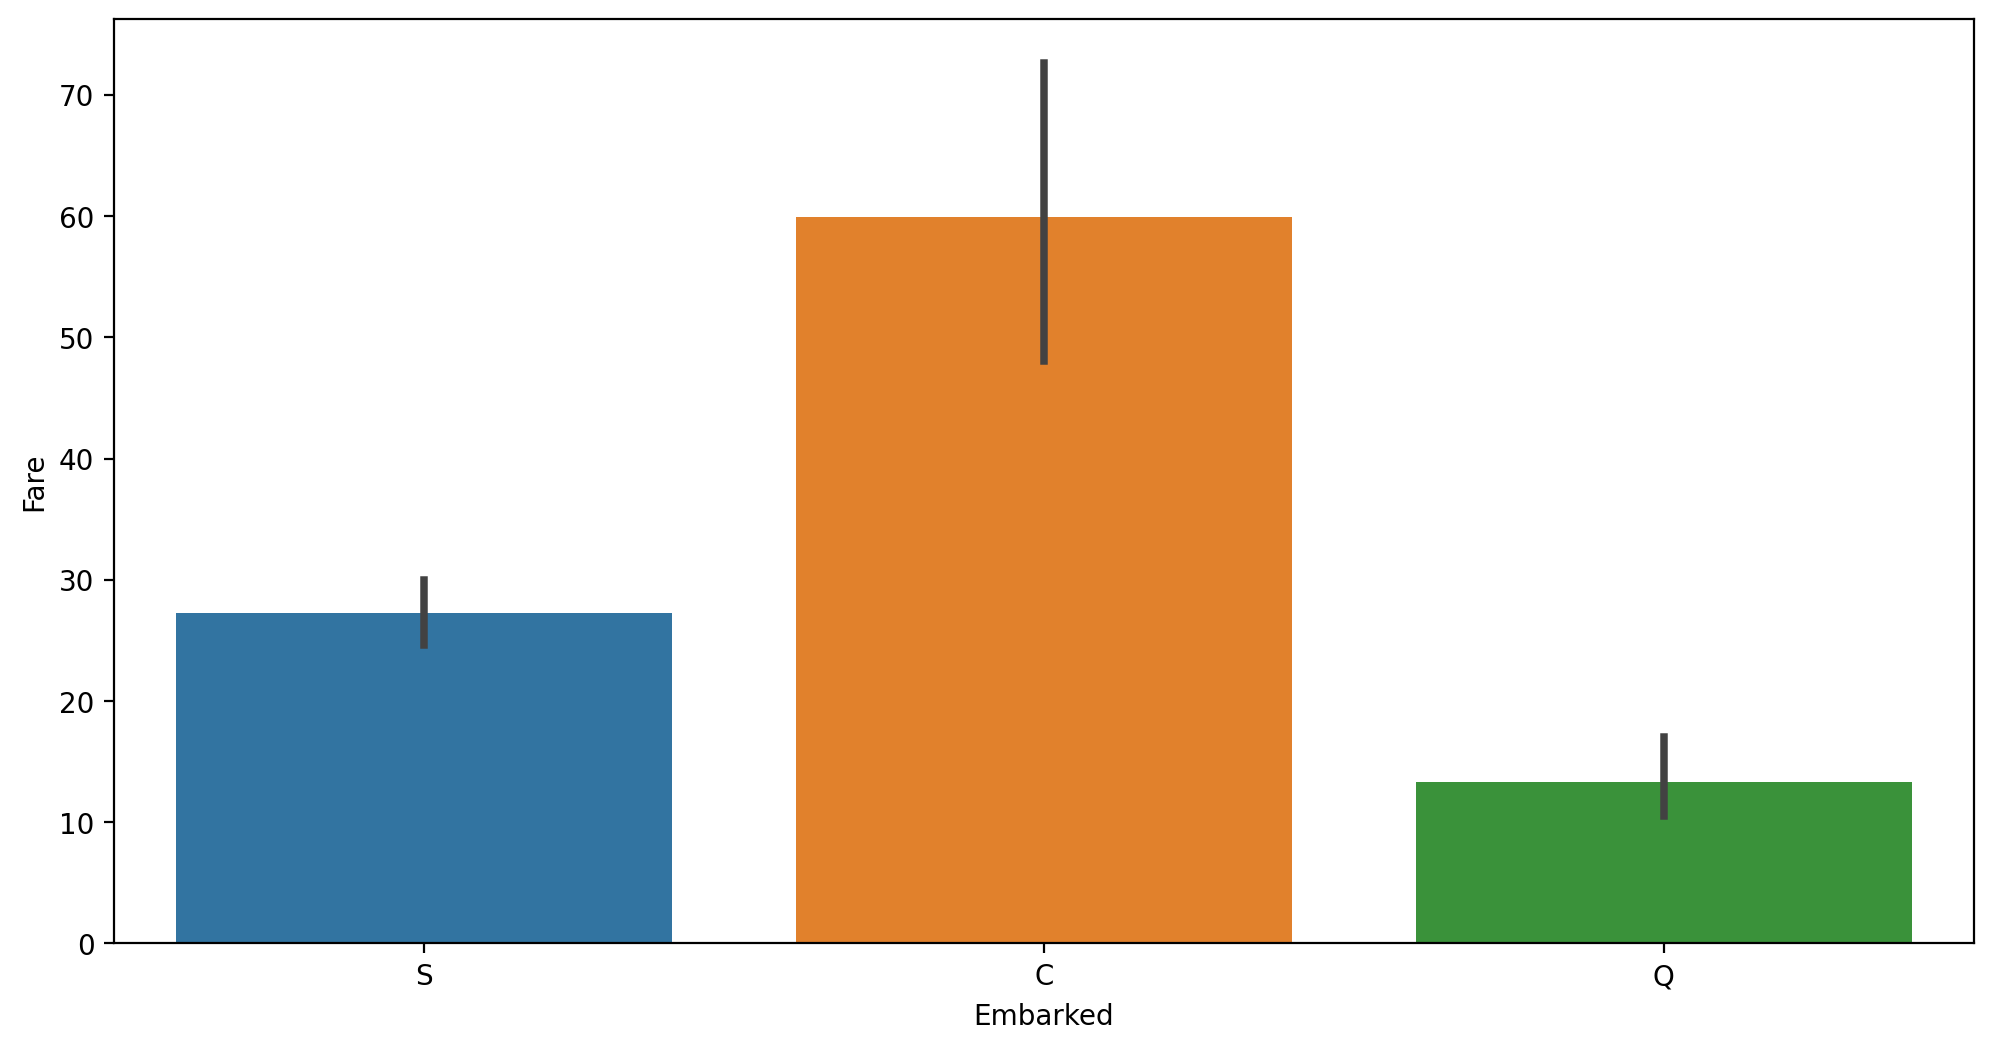

In [46]:
# Fare affected by Embarked
plt.figure(figsize = (12,6),dpi =200)
sns.barplot(x ="Embarked", y ="Fare",data = data )

In [47]:
# Fare abouve the 500
abouve_500 = data[data.Fare >= 500 ]
abouve_500

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
258,259,1,1,"Ward, Miss. Anna",female,35.0,PC 17755,512.3292,C,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,PC 17755,512.3292,C,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,PC 17755,512.3292,C,0


In [48]:
len(abouve_500)

3

In [49]:
# Fare 200 to 500
Fare_200_to_500 = data[(data.Fare >=200) & (data.Fare <= 500)]
Fare_200_to_500.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,19950,263.0,S,5
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,19950,263.0,S,5


In [50]:
len(Fare_200_to_500)

17

In [51]:
# Fare lessthan 100
Fare_lessthan_100 = data[data.Fare <= 100]
Fare_lessthan_100.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1


In [52]:
len(Fare_lessthan_100)

838

<Axes: xlabel='Sex', ylabel='Fare'>

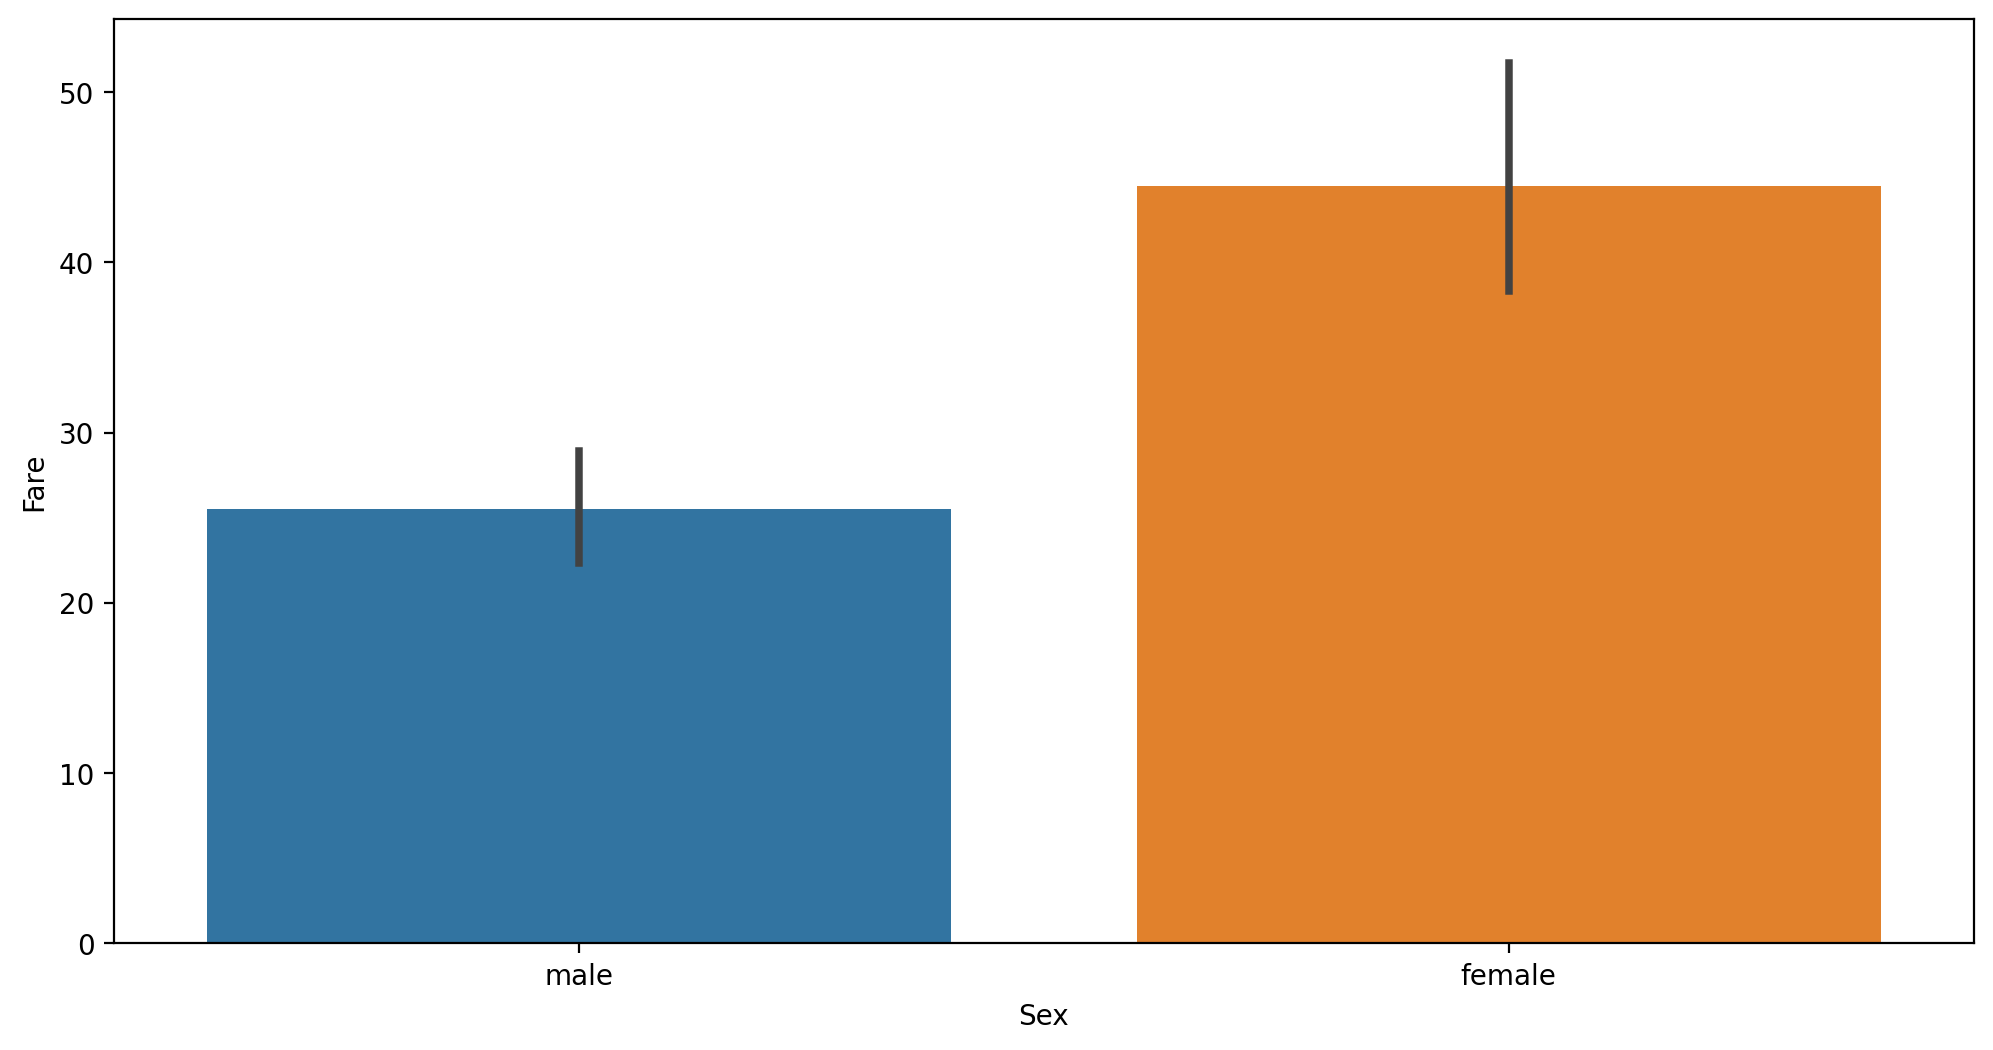

In [53]:
# Fare affected by Sex
plt.figure(figsize = (12,6),dpi =200)
sns.barplot(x ="Sex", y ="Fare",data =data)

In [54]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.25,S,1


<Axes: xlabel='Survived', ylabel='Fare'>

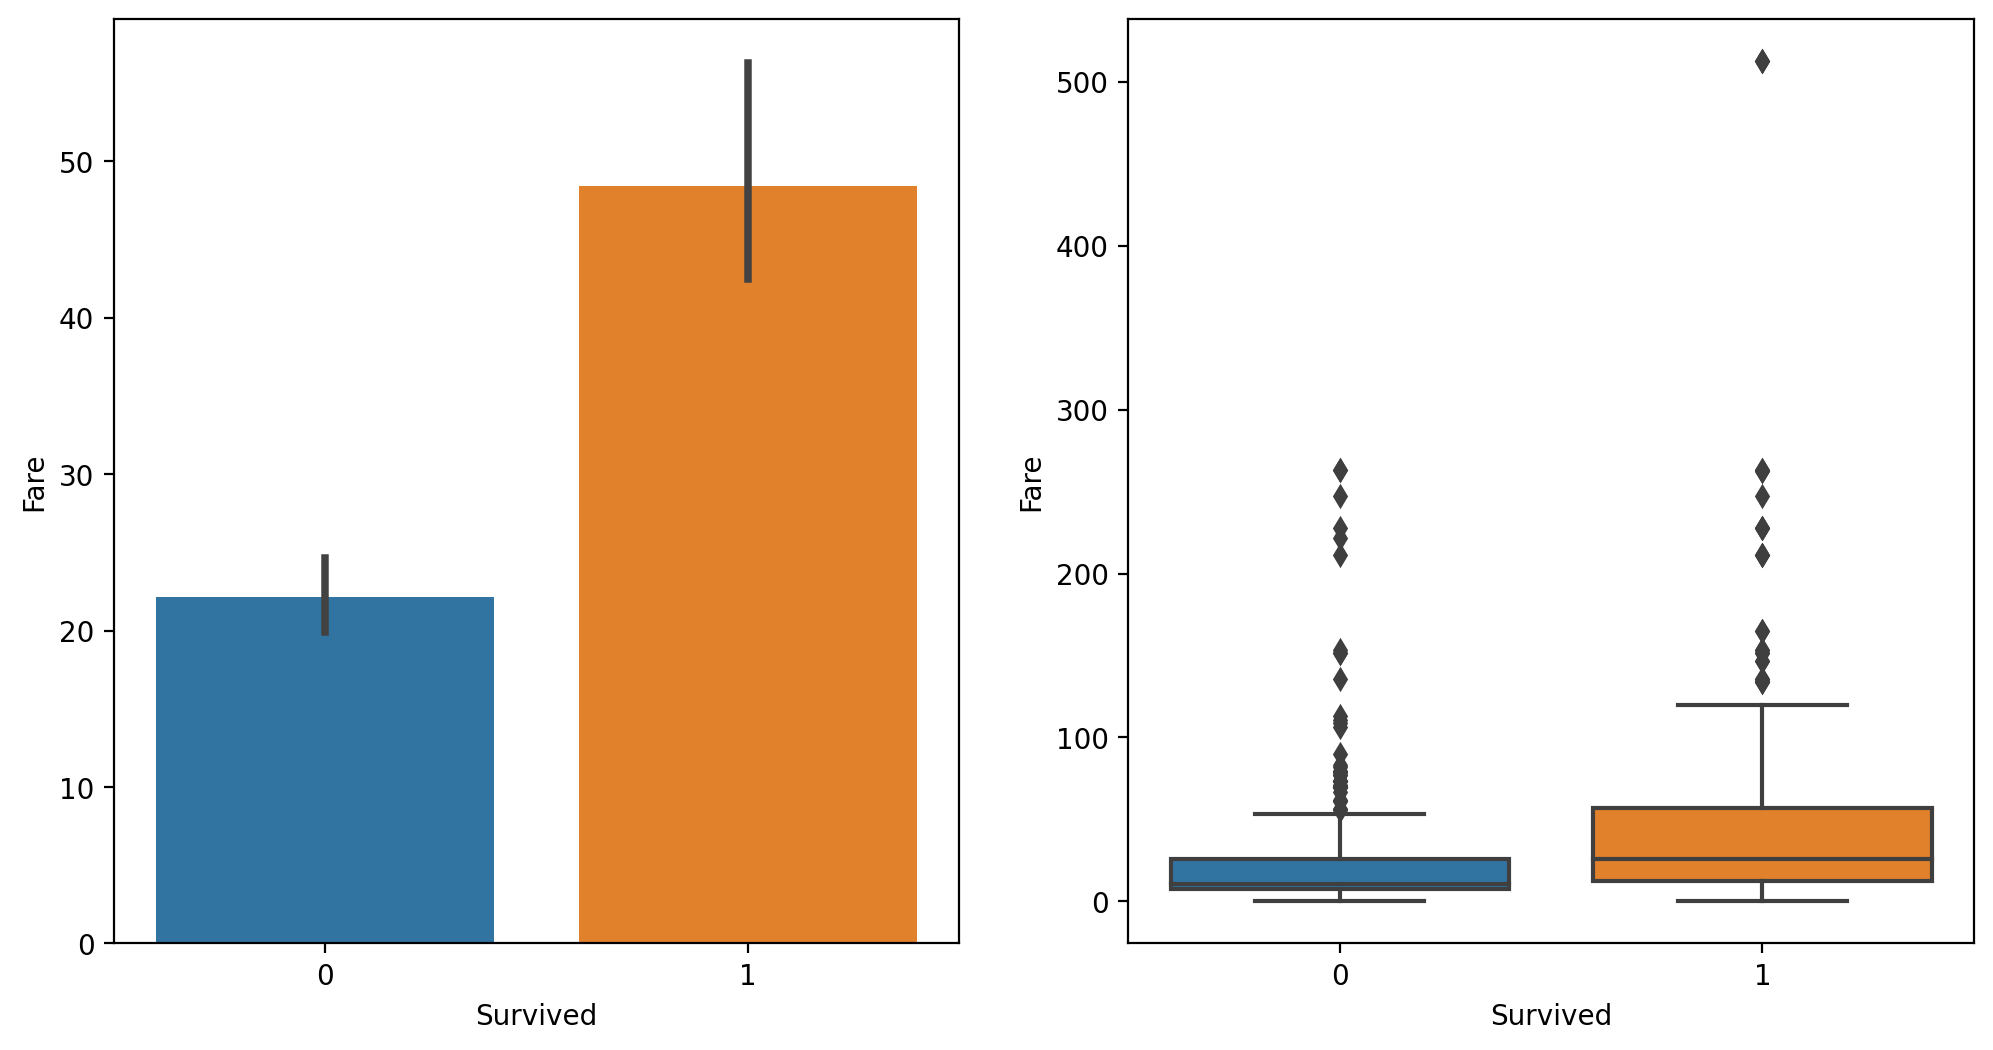

In [55]:
# Survived affected by fare
plt.figure(figsize  = (12,6), dpi=200)
plt.subplot(1,2,1)
sns.barplot(x = "Survived",y = "Fare", data = data)

plt.subplot(1,2,2)
sns.boxplot(x = "Survived",y = "Fare", data= data)

<Axes: xlabel='Pclass', ylabel='Fare'>

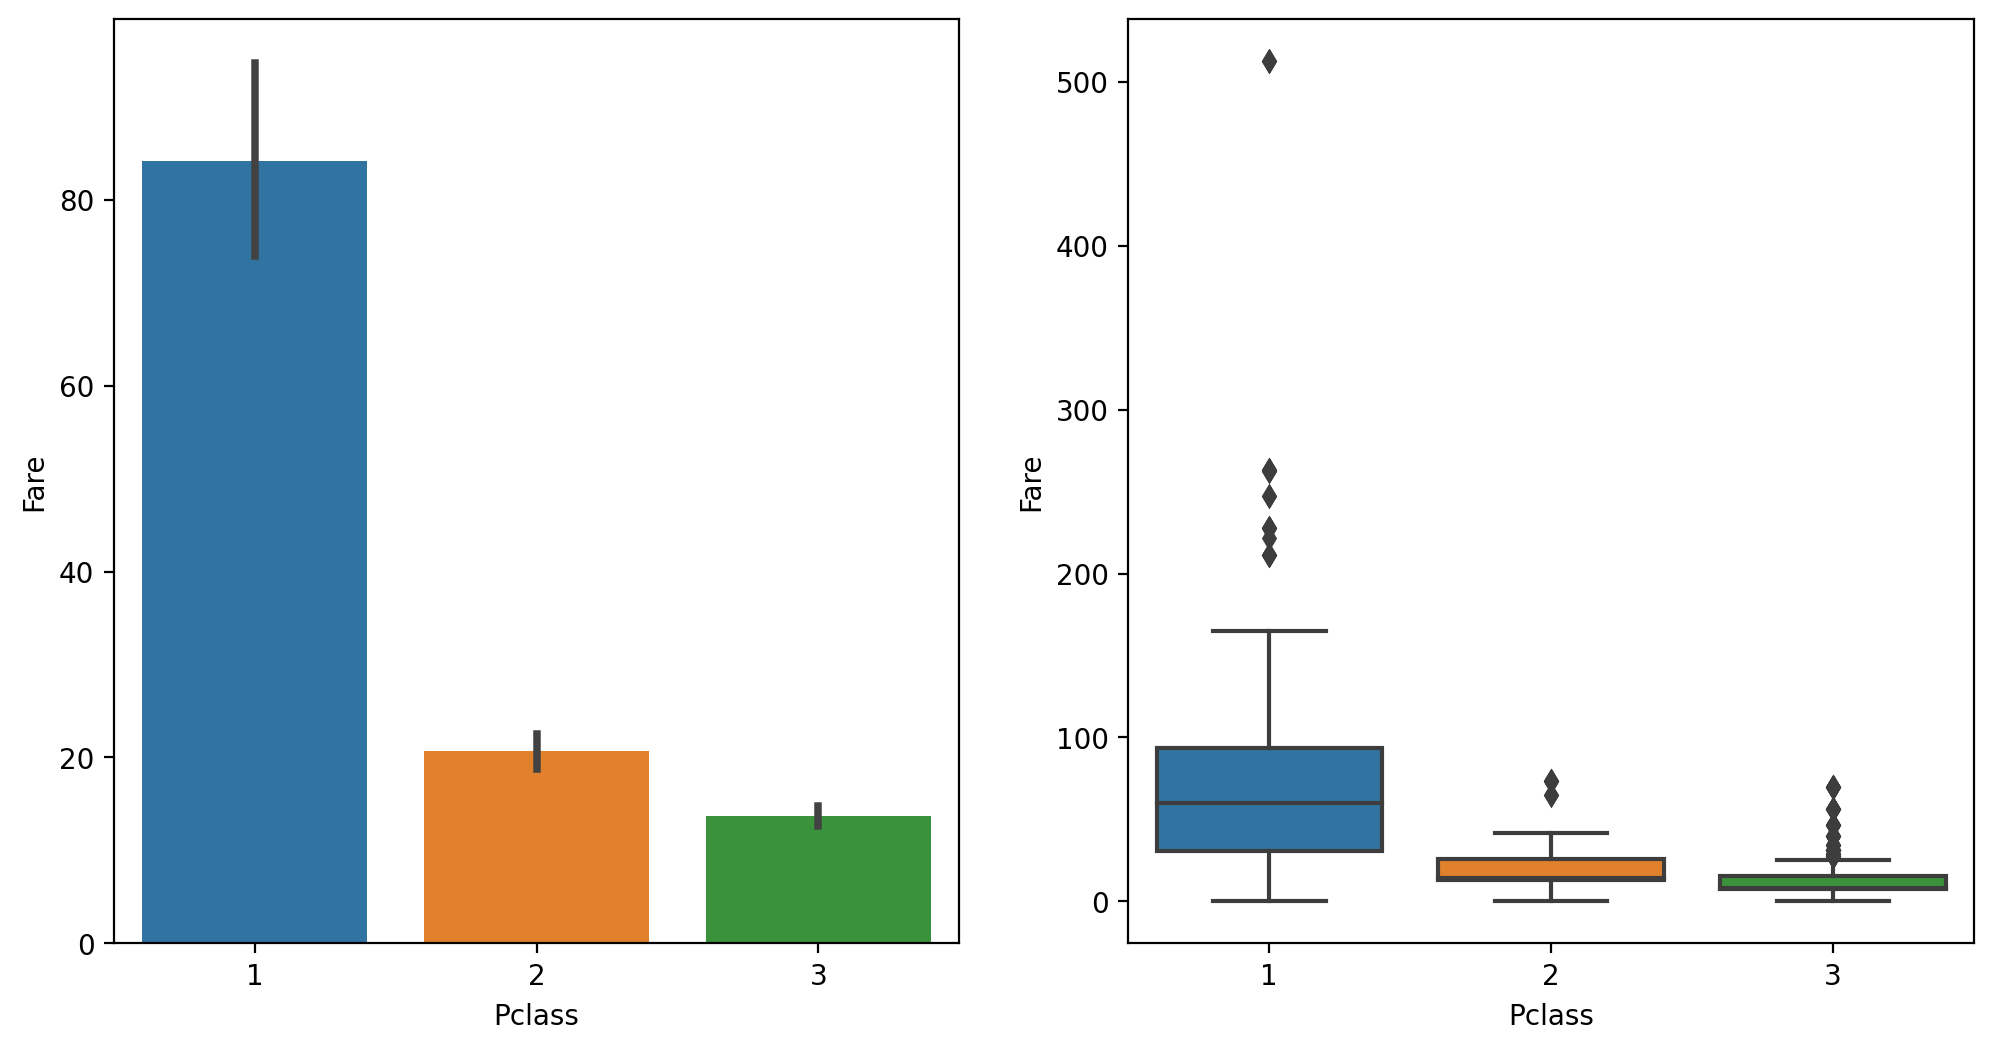

In [56]:
# pclass affected by fare
plt.figure(figsize  = (12,6), dpi=200)
plt.subplot(1,2,1)
sns.barplot(x = "Pclass",y = "Fare", data = data)

plt.subplot(1,2,2)
sns.boxplot(x = "Pclass",y = "Fare", data= data)

<Axes: xlabel='Embarked', ylabel='Fare'>

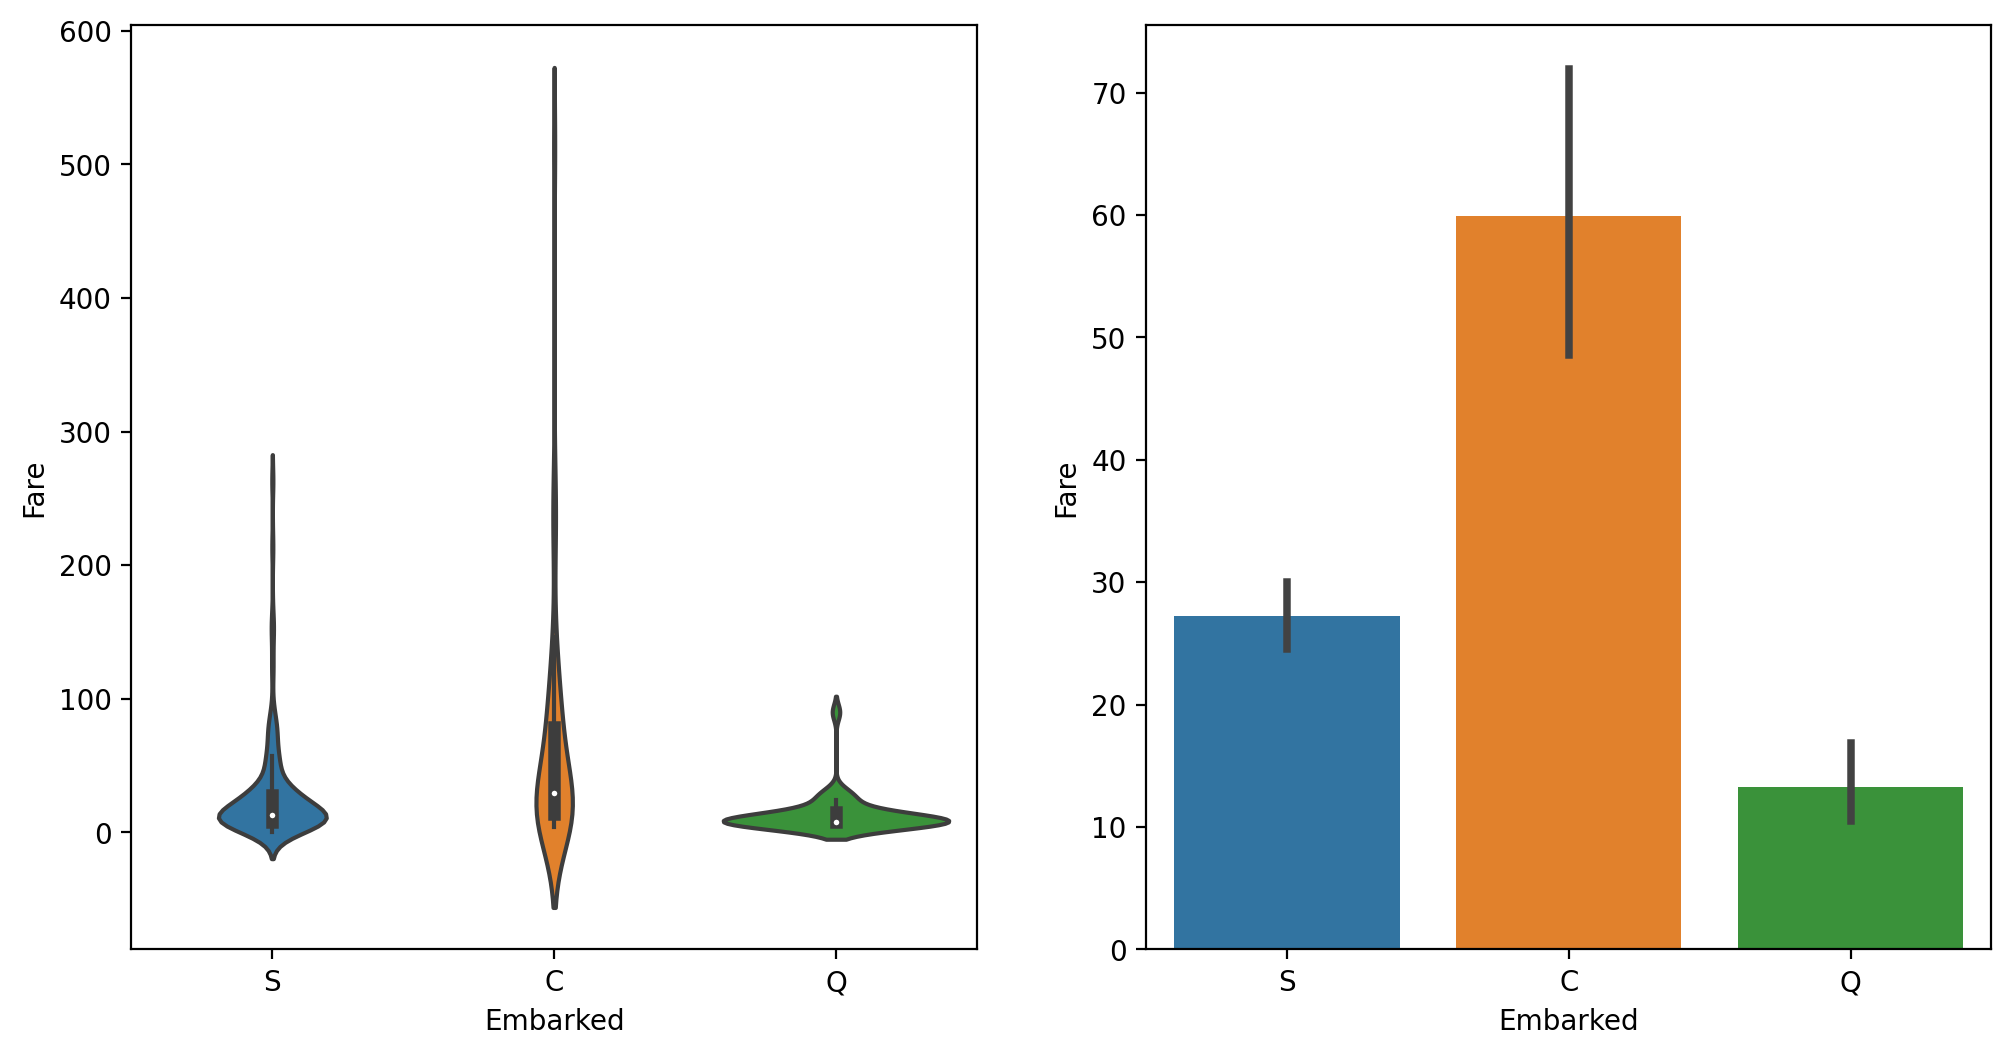

In [57]:
# Embacked affect by fare
plt.figure(figsize  = (12,6), dpi=200)
plt.subplot(1,2,1)
sns.violinplot(x = "Embarked", y = "Fare", data = data)

plt.subplot(1,2,2)
sns.barplot(x = "Embarked", y = "Fare", data = data)

In [58]:
# age above 50
age_above_50 = data[data.Age >= 50]
age_above_50.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,17463,51.8625,S,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,113783,26.5500,S,0


In [59]:
len(age_above_50)

74

In [60]:
# # student = ["Pravash","Durgadatta","sai","Dipti","Sowmiya"]
# # mark = [80,90,70,85,65]
# plt.figure(figsize = (12,6),dpi = 200)
# sns.scatterplot(x = "Survived", data = data.Age)
# # plt.bar(student,mark)

In [61]:
# age between 20 to 50
age_above_40_to_50 = data[(data.Age >= 40) & (data.Age <= 50)]
age_above_40_to_50.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,PC 17601,27.7208,C,0
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,113789,52.0000,S,1


In [62]:
len(age_above_40_to_50)

99

In [63]:
# age between 30 to 40
age_above_30_to_40 = data[(data.Age >= 30) & (data.Age <= 40)]
age_above_30_to_40.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1


In [64]:
len(age_above_30_to_40)

180

In [65]:
# age between 20 to 30
age_above_20_to_30 = data[(data.Age >= 20) & (data.Age <= 30)]
age_above_20_to_30.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.250,S,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.925,S,0


In [66]:
len(age_above_20_to_30)

422

In [67]:
# age lessthan 20 
age_lessthan_20 = data[data.Age < 20]
age_lessthan_20.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,349909,21.0750,S,4
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,237736,30.0708,C,1


In [68]:
len(age_lessthan_20)

164

- **Mainly between 20 to 30 years people are mostly staying in the ships**

<Axes: xlabel='Survived', ylabel='Age'>

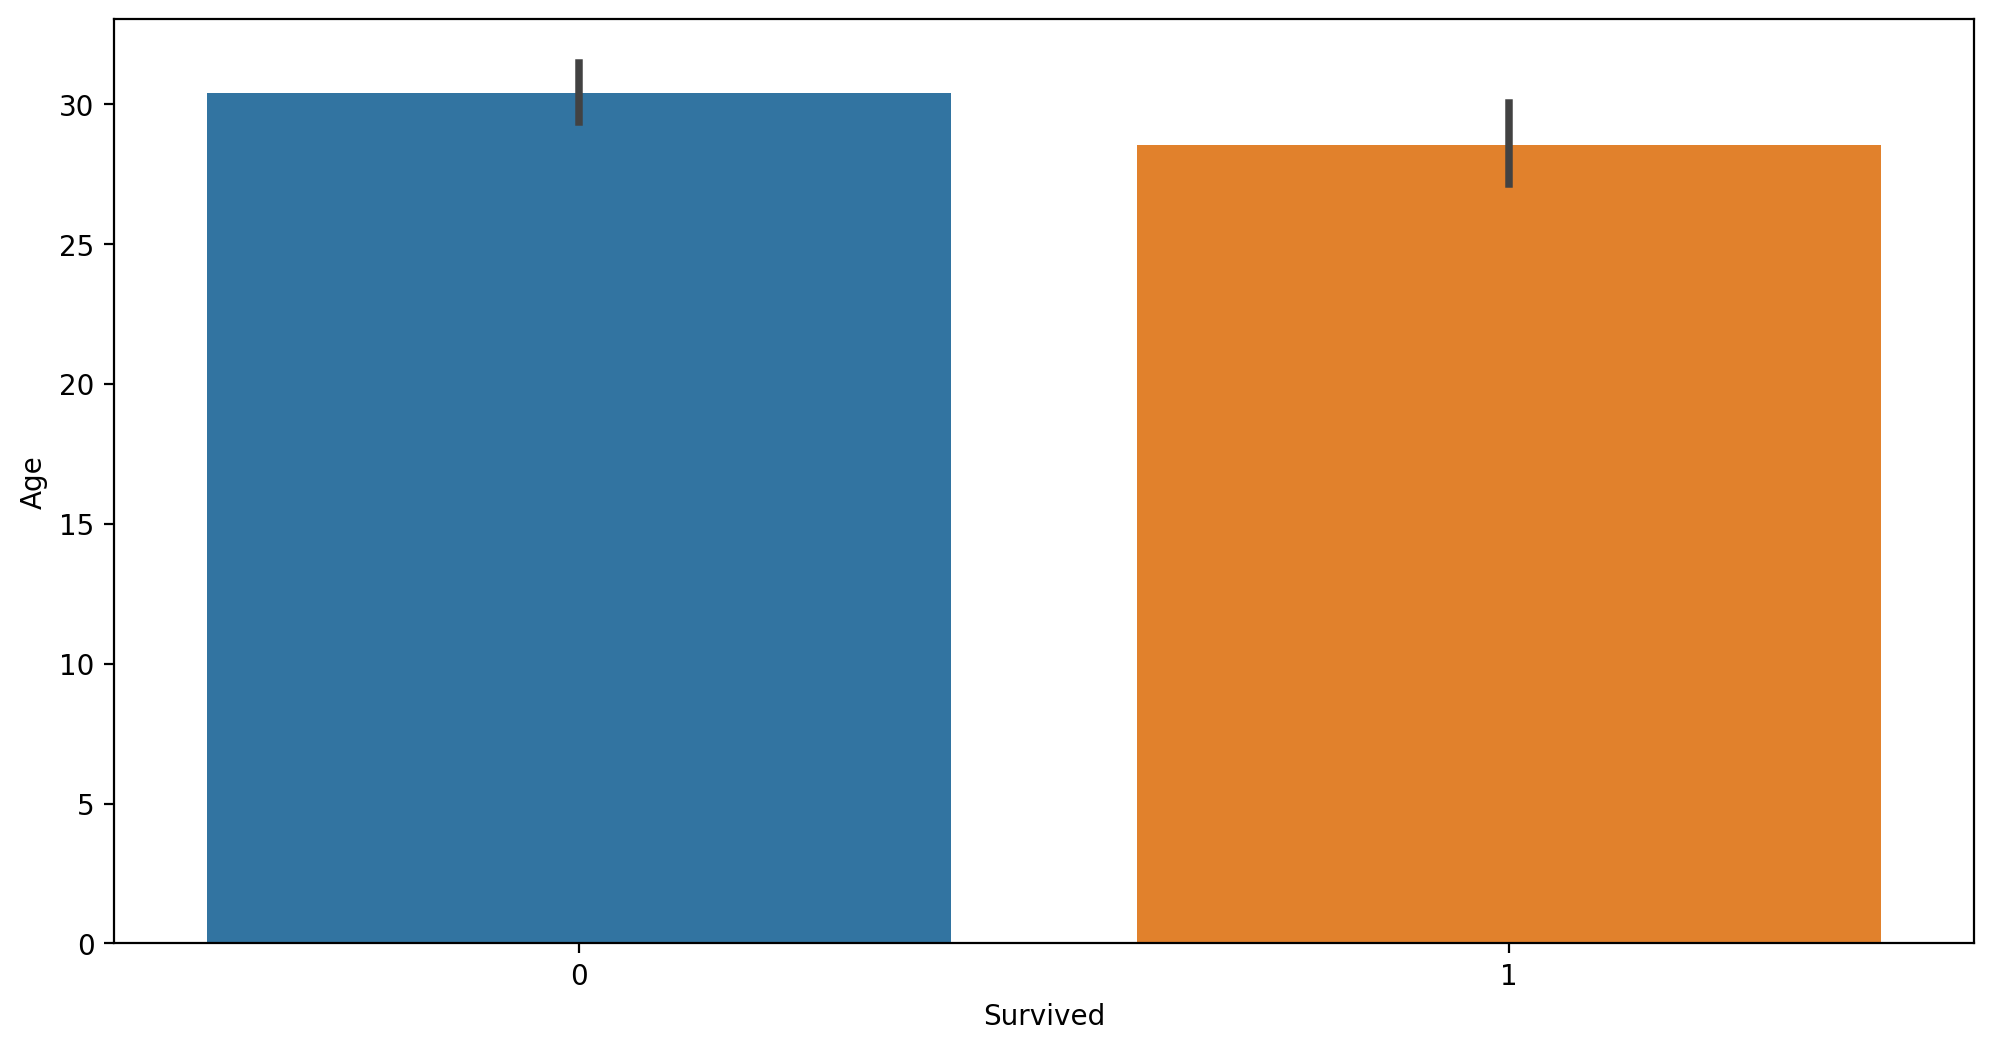

In [69]:
plt.figure(figsize = (12,6),dpi =200)
sns.barplot(x = "Survived", y = "Age", data =data )

In [70]:
# data.groupby(by ="family_members").value_counts()

<Axes: xlabel='family_members', ylabel='count'>

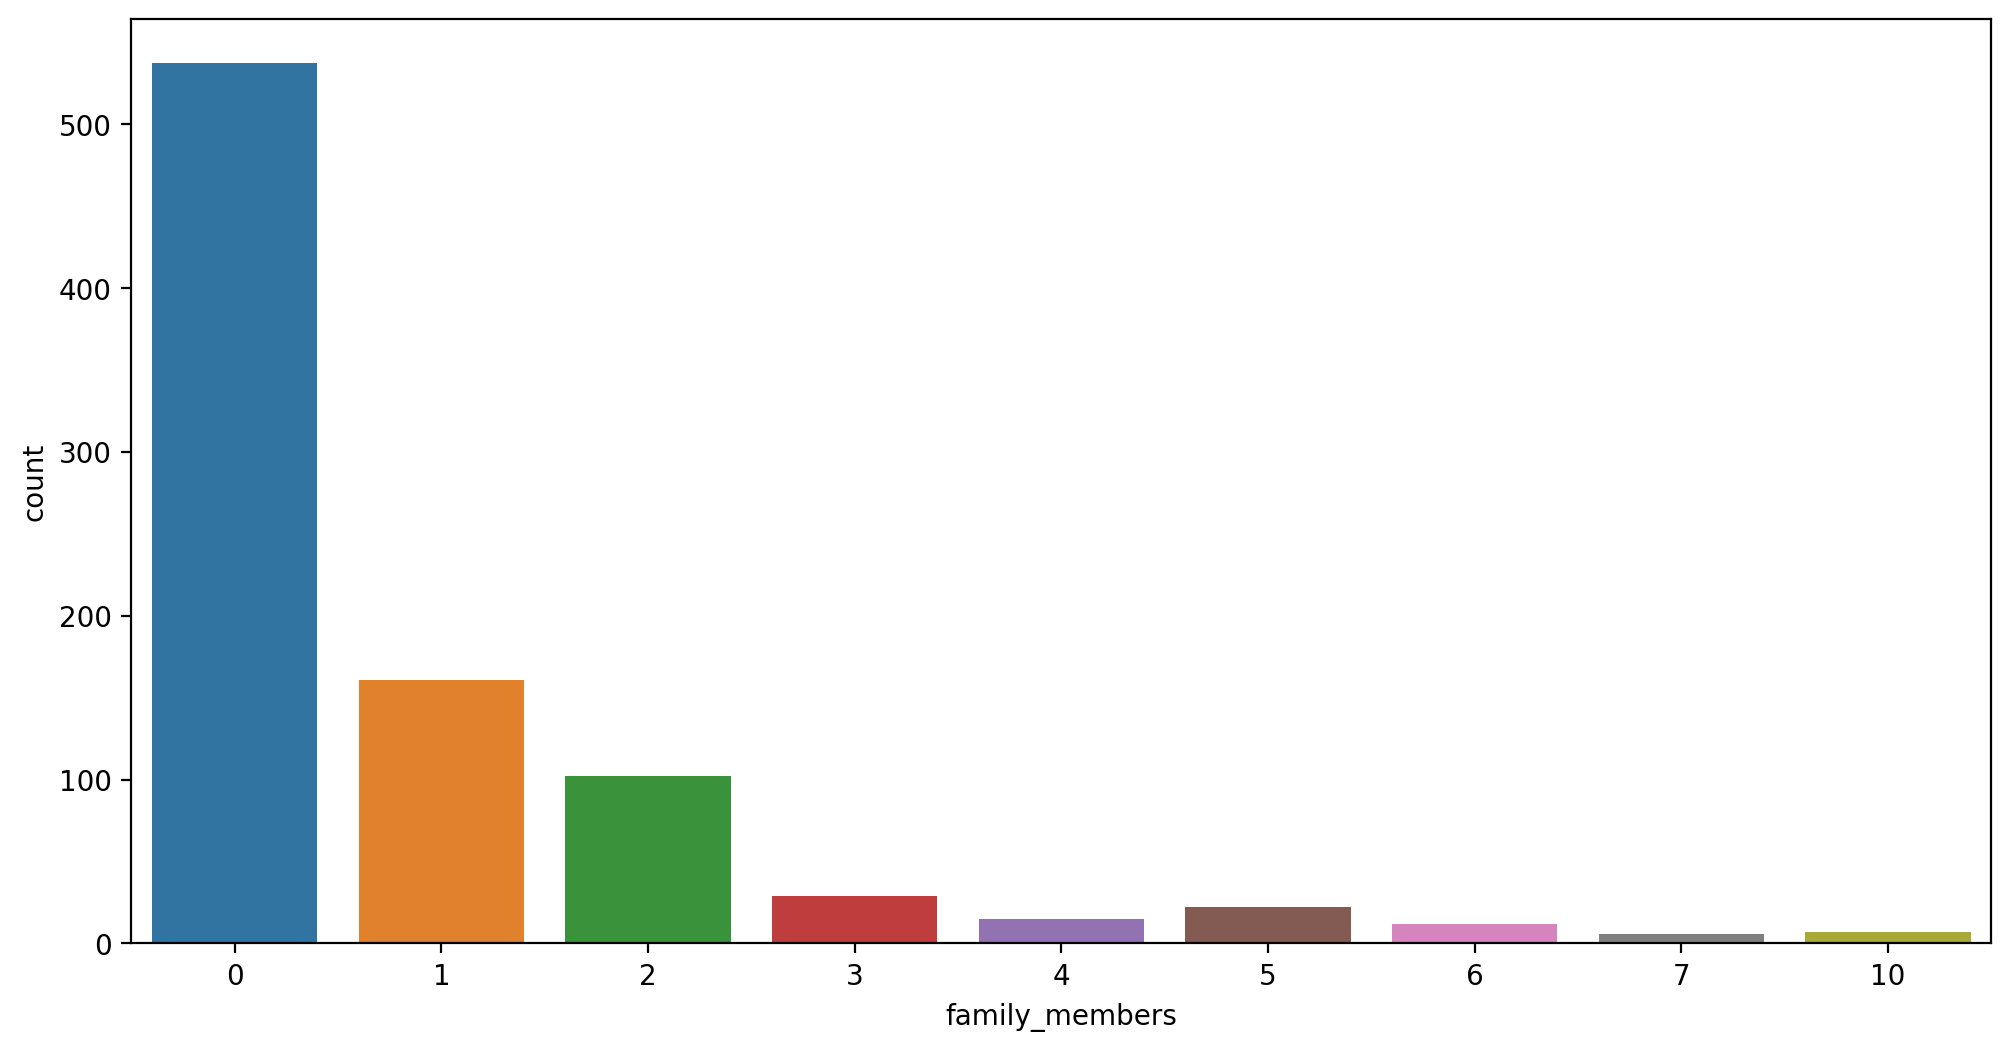

In [71]:
plt.figure(figsize =(12,6),dpi = 200)
sns.countplot(x ="family_members" ,data =data)

In [72]:
data.groupby(by ="family_members").Survived.value_counts()

family_members  Survived
0               0           374
                1           163
1               1            89
                0            72
2               1            59
                0            43
3               1            21
                0             8
4               0            12
                1             3
5               0            19
                1             3
6               0             8
                1             4
7               0             6
10              0             7
Name: Survived, dtype: int64

<Axes: xlabel='family_members', ylabel='count'>

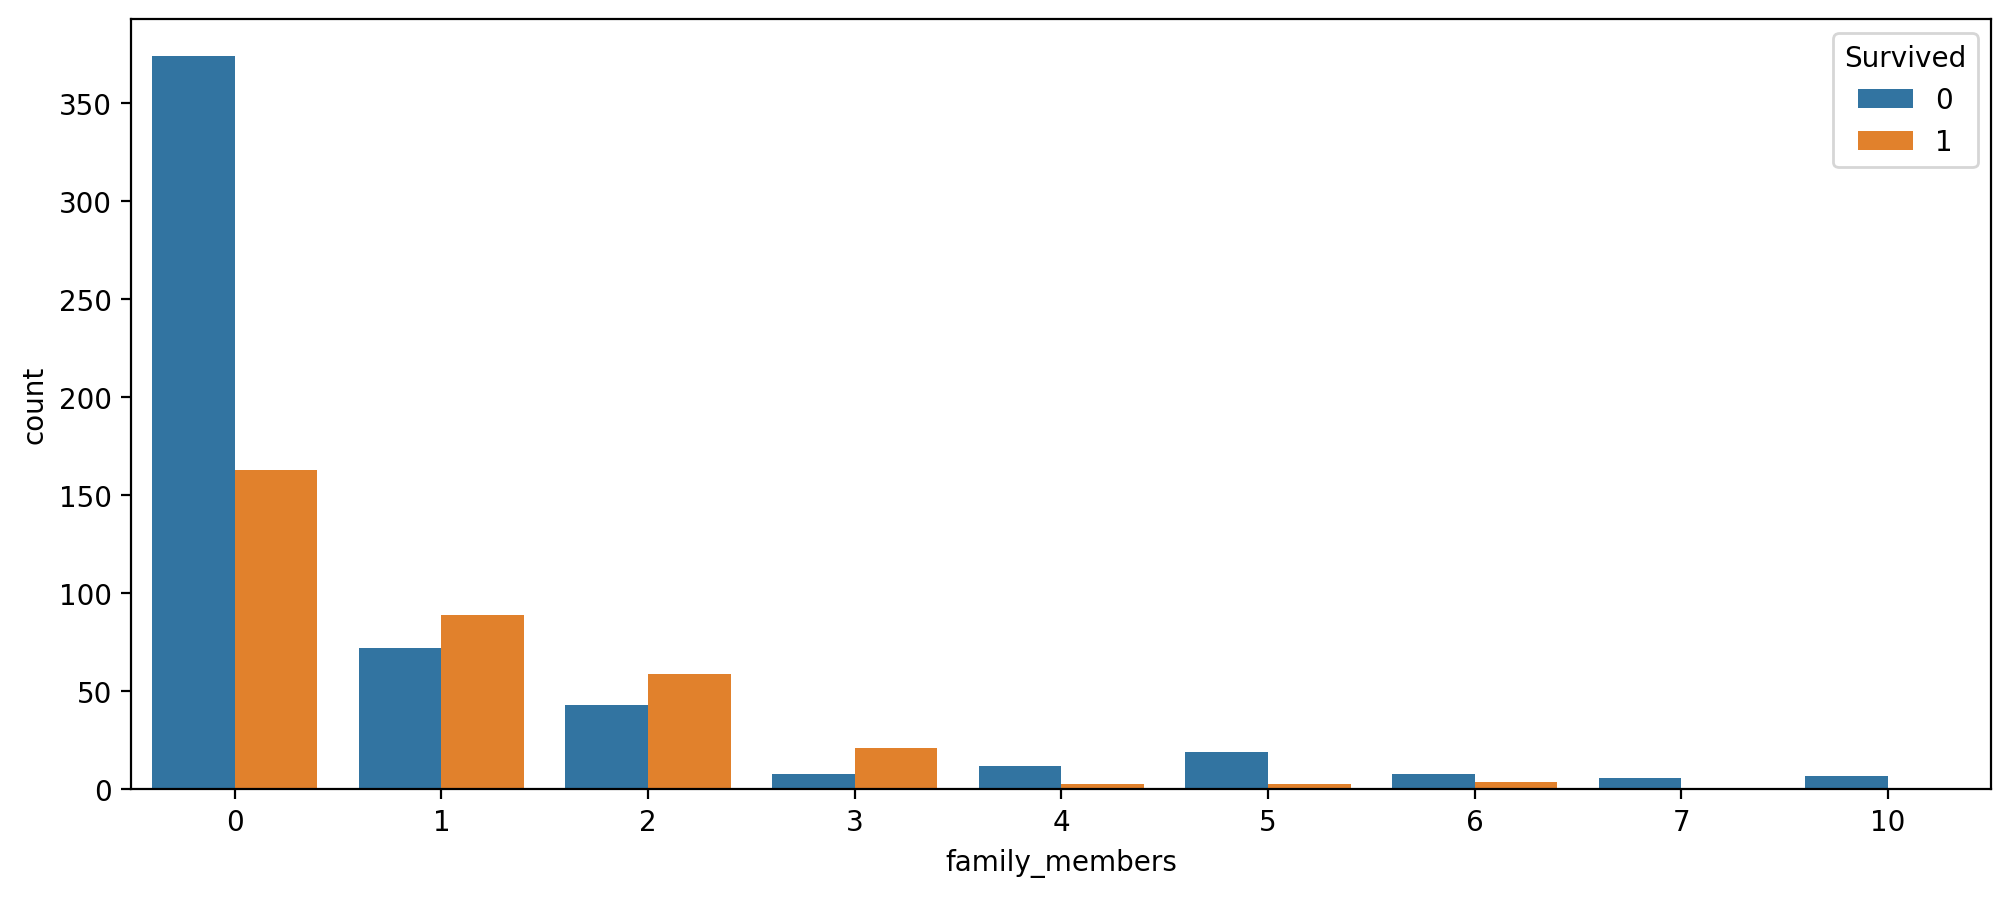

In [73]:
# Family members wrt survival
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(x ='family_members', hue = 'Survived', data = data)